# ***This Code is prepared by Afshin Marani and Zahra Mohammadi for Group 13***

# Machine Learning Avenues in Solving Partial Differential Equations (PDEs)

# Case Study 1: Solution of A Theoritical PDE: Heat Transfer Equation

Importing the required built-in libraries for data preprocessing, data visualization, algorithm implementation, and error metrics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import os
import glob


Importing and preprocessing the dataset

In [2]:
os.chdir('C:/Users/Afshin/Desktop/Temp. Needed/UWO/Winter Semester/ECE 9309/Project/Python/dataset')
extension = 'xlsx'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]


In [3]:
all_filenames

['data10.xlsx',
 'data10B.xlsx',
 'data20.xlsx',
 'data20B.xlsx',
 'data30.xlsx',
 'data30B.xlsx',
 'data40.xlsx',
 'data40B.xlsx',
 'data50.xlsx',
 'data50B.xlsx',
 'data60.xlsx',
 'data60B.xlsx',
 'data70.xlsx',
 'data70B.xlsx',
 'data80.xlsx',
 'data80B.xlsx',
 'data90.xlsx',
 'data90B.xlsx',
 'data910.xlsx',
 'data910B.xlsx']

In [4]:
all_data = pd.DataFrame()
for f in all_filenames:
    df = pd.read_excel(f, dtype='float64')
    all_data = all_data.append(df,ignore_index=False, sort=False)

In [5]:
# Size of uncleaned dataset
print('The size of imported dataset is:', all_data.shape)
all_data

The size of imported dataset is: (10763570, 7)


x         y  t (time)   Tint  T (output)  Unnamed: 5  \
0       0.000000  0.000000       0.0   10.0    5.000000         NaN   
1       1.000000  0.000000       0.0   10.0    0.000000         NaN   
2       1.000000  1.000000       0.0   10.0    0.000000         NaN   
3       0.000000  1.000000       0.0   10.0    5.000000         NaN   
4       0.100000  0.000000       0.0   10.0    0.000000         NaN   
5       0.200000  0.000000       0.0   10.0    0.000000         NaN   
6       0.300000  0.000000       0.0   10.0    0.000000         NaN   
7       0.400000  0.000000       0.0   10.0    0.000000         NaN   
8       0.500000  0.000000       0.0   10.0    0.000000         NaN   
9       0.600000  0.000000       0.0   10.0    0.000000         NaN   
10      0.700000  0.000000       0.0   10.0    0.000000         NaN   
11      0.800000  0.000000       0.0   10.0    0.000000         NaN   
12      0.900000  0.000000       0.0   10.0    0.000000         NaN   
13      1.000000  0.100000       0.0   10.0    0.000000         NaN   
14      1.000000  0.200000       0.0   10.0    0.000000         NaN   
15      1.000000  0.300000       0.0   10.0    0.000000         NaN   
16      1.000000  0.400000       0.0   10.0    0.000000         NaN   
17      1.000000  0.500000       0.0   10.0    0.000000         NaN   
18      1.000000  0.600000       0.0   10.0    0.000000         NaN   
19      1.000000  0.700000       0.0   10.0    0.000000         NaN   
20      1.000000  0.800000       0.0   10.0    0.000000         NaN   
21      1.000000  0.900000       0.0   10.0    0.000000         NaN   
22      0.900000  1.000000       0.0   10.0    0.000000         NaN   
23      0.800000  1.000000       0.0   10.0    0.000000         NaN   
24      0.700000  1.000000       0.0   10.0    0.000000         NaN   
25      0.600000  1.000000       0.0   10.0    0.000000         NaN   
26      0.500000  1.000000       0.0   10.0    0.000000         NaN   
27      0.400000  1.000000       0.0   10.0    0.000000         NaN   
28      0.300000  1.000000       0.0   10.0    0.000000         NaN   
29      0.200000  1.000000       0.0   10.0    0.000000         NaN   
...          ...       ...       ...    ...         ...         ...   
543477  0.670198  0.346033       1.0  100.0   12.011094         NaN   
543478  0.683327  0.330163       1.0  100.0   11.081228         NaN   
543479  0.680762  0.347388       1.0  100.0   11.529428         NaN   
543480  0.666602  0.336401       1.0  100.0   11.994138         NaN   
543481  0.704947  0.302901       1.0  100.0    9.580578         NaN   
543482  0.695085  0.315540       1.0  100.0   10.260570         NaN   
543483  0.708303  0.309345       1.0  100.0    9.573240         NaN   
543484  0.697627  0.301655       1.0  100.0    9.858984         NaN   
543485  0.701915  0.348988       1.0  100.0   10.577157         NaN   
543486  0.693140  0.331214       1.0  100.0   10.656543         NaN   
543487  0.691333  0.348388       1.0  100.0   11.051585         NaN   
543488  0.707590  0.340314       1.0  100.0   10.177982         NaN   
543489  0.687139  0.339193       1.0  100.0   11.080028         NaN   
543490  0.660532  0.317345       1.0  100.0   11.866884         NaN   
543491  0.679946  0.321293       1.0  100.0   11.053430         NaN   
543492  0.663370  0.326837       1.0  100.0   11.946381         NaN   
543493  0.667678  0.310329       1.0  100.0   11.369550         NaN   
543494  0.673397  0.328686       1.0  100.0   11.511299         NaN   
543495  0.717311  0.323500       1.0  100.0    9.465796         NaN   
543496  0.698738  0.323558       1.0  100.0   10.261426         NaN   
543497  0.712522  0.316175       1.0  100.0    9.530663         NaN   
543498  0.712738  0.331786       1.0  100.0    9.806686         NaN   
543499  0.703815  0.316221       1.0  100.0    9.898820         NaN   
543500  0.702946  0.331774       1.0  100.0   10.231663         NaN   
543501  0.681449  0.297446       1.0  1

Dropping Extra columns from dataset

In [6]:
all_data=all_data.drop('Unnamed: 5', axis=1)
all_data=all_data.drop('Unnamed: 6', axis=1)

In [7]:
# Size of cleaned dataset
print('The size of cleaned dataset is:', all_data.shape)
all_data

The size of cleaned dataset is: (10763570, 5)


x         y  t (time)   Tint  T (output)
0       0.000000  0.000000       0.0   10.0    5.000000
1       1.000000  0.000000       0.0   10.0    0.000000
2       1.000000  1.000000       0.0   10.0    0.000000
3       0.000000  1.000000       0.0   10.0    5.000000
4       0.100000  0.000000       0.0   10.0    0.000000
5       0.200000  0.000000       0.0   10.0    0.000000
6       0.300000  0.000000       0.0   10.0    0.000000
7       0.400000  0.000000       0.0   10.0    0.000000
8       0.500000  0.000000       0.0   10.0    0.000000
9       0.600000  0.000000       0.0   10.0    0.000000
10      0.700000  0.000000       0.0   10.0    0.000000
11      0.800000  0.000000       0.0   10.0    0.000000
12      0.900000  0.000000       0.0   10.0    0.000000
13      1.000000  0.100000       0.0   10.0    0.000000
14      1.000000  0.200000       0.0   10.0    0.000000
15      1.000000  0.300000       0.0   10.0    0.000000
16      1.000000  0.400000       0.0   10.0    0.000000
17      1.000000  0.500000       0.0   10.0    0.000000
18      1.000000  0.600000       0.0   10.0    0.000000
19      1.000000  0.700000       0.0   10.0    0.000000
20      1.000000  0.800000       0.0   10.0    0.000000
21      1.000000  0.900000       0.0   10.0    0.000000
22      0.900000  1.000000       0.0   10.0    0.000000
23      0.800000  1.000000       0.0   10.0    0.000000
24      0.700000  1.000000       0.0   10.0    0.000000
25      0.600000  1.000000       0.0   10.0    0.000000
26      0.500000  1.000000       0.0   10.0    0.000000
27      0.400000  1.000000       0.0   10.0    0.000000
28      0.300000  1.000000       0.0   10.0    0.000000
29      0.200000  1.000000       0.0   10.0    0.000000
...          ...       ...       ...    ...         ...
543477  0.670198  0.346033       1.0  100.0   12.011094
543478  0.683327  0.330163       1.0  100.0   11.081228
543479  0.680762  0.347388       1.0  100.0   11.529428
543480  0.666602  0.336401       1.0  100.0   11.994138
543481  0.704947  0.302901       1.0  100.0    9.580578
543482  0.695085  0.315540       1.0  100.0   10.260570
543483  0.708303  0.309345       1.0  100.0    9.573240
543484  0.697627  0.301655       1.0  100.0    9.858984
543485  0.701915  0.348988       1.0  100.0   10.577157
543486  0.693140  0.331214       1.0  100.0   10.656543
543487  0.691333  0.348388       1.0  100.0   11.051585
543488  0.707590  0.340314       1.0  100.0   10.177982
543489  0.687139  0.339193       1.0  100.0   11.080028
543490  0.660532  0.317345       1.0  100.0   11.866884
543491  0.679946  0.321293       1.0  100.0   11.053430
543492  0.663370  0.326837       1.0  100.0   11.946381
543493  0.667678  0.310329       1.0  100.0   11.369550
543494  0.673397  0.328686       1.0  100.0   11.511299
543495  0.717311  0.323500       1.0  100.0    9.465796
543496  0.698738  0.323558       1.0  100.0   10.261426
543497  0.712522  0.316175       1.0  100.0    9.530663
543498  0.712738  0.331786       1.0  100.0    9.806686
543499  0.703815  0.316221       1.0  100.0    9.898820
543500  0.702946  0.331774       1.0  100.0   10.231663
543501  0.681449  0.297446       1.0  100.0   10.452552
543502  0.686161  0.314247       1.0  100.0   10.624551
543503  0.689791  0.299736       1.0  100.0   10.147643
543504  0.674663  0.303683       1.0  100.0   10.897411
543505  0.692084  0.307667       1.0  100.0   10.224672
543506  0.677053  0.312472       1.0  100.0   10.992309

[10763570 rows x 5 columns]

Now, we check for any missing value

In [8]:
#checking for missing value
print ('Missing Values:')
print (all_data.isnull().sum())

Missing Values:
x             0
y             0
t (time)      0
Tint          1
T (output)    0
dtype: int64


Now, we change the names of the features for convenience purpose, and also fill the missing values

In [9]:
#Changing the label of features for convenience in coding process and filling the missing value
all_data=all_data.rename(columns={'T (output)': 'Tout'})
#data=all_data.fillna(method='bfill')
data=all_data.fillna(method='ffill')
print('The size of cleaned dataset is:', all_data.shape)
print ('Missing Values:')
print(data.isnull().sum())
data

The size of cleaned dataset is: (10763570, 5)
Missing Values:
x           0
y           0
t (time)    0
Tint        0
Tout        0
dtype: int64


x         y  t (time)   Tint       Tout
0       0.000000  0.000000       0.0   10.0   5.000000
1       1.000000  0.000000       0.0   10.0   0.000000
2       1.000000  1.000000       0.0   10.0   0.000000
3       0.000000  1.000000       0.0   10.0   5.000000
4       0.100000  0.000000       0.0   10.0   0.000000
5       0.200000  0.000000       0.0   10.0   0.000000
6       0.300000  0.000000       0.0   10.0   0.000000
7       0.400000  0.000000       0.0   10.0   0.000000
8       0.500000  0.000000       0.0   10.0   0.000000
9       0.600000  0.000000       0.0   10.0   0.000000
10      0.700000  0.000000       0.0   10.0   0.000000
11      0.800000  0.000000       0.0   10.0   0.000000
12      0.900000  0.000000       0.0   10.0   0.000000
13      1.000000  0.100000       0.0   10.0   0.000000
14      1.000000  0.200000       0.0   10.0   0.000000
15      1.000000  0.300000       0.0   10.0   0.000000
16      1.000000  0.400000       0.0   10.0   0.000000
17      1.000000  0.500000       0.0   10.0   0.000000
18      1.000000  0.600000       0.0   10.0   0.000000
19      1.000000  0.700000       0.0   10.0   0.000000
20      1.000000  0.800000       0.0   10.0   0.000000
21      1.000000  0.900000       0.0   10.0   0.000000
22      0.900000  1.000000       0.0   10.0   0.000000
23      0.800000  1.000000       0.0   10.0   0.000000
24      0.700000  1.000000       0.0   10.0   0.000000
25      0.600000  1.000000       0.0   10.0   0.000000
26      0.500000  1.000000       0.0   10.0   0.000000
27      0.400000  1.000000       0.0   10.0   0.000000
28      0.300000  1.000000       0.0   10.0   0.000000
29      0.200000  1.000000       0.0   10.0   0.000000
...          ...       ...       ...    ...        ...
543477  0.670198  0.346033       1.0  100.0  12.011094
543478  0.683327  0.330163       1.0  100.0  11.081228
543479  0.680762  0.347388       1.0  100.0  11.529428
543480  0.666602  0.336401       1.0  100.0  11.994138
543481  0.704947  0.302901       1.0  100.0   9.580578
543482  0.695085  0.315540       1.0  100.0  10.260570
543483  0.708303  0.309345       1.0  100.0   9.573240
543484  0.697627  0.301655       1.0  100.0   9.858984
543485  0.701915  0.348988       1.0  100.0  10.577157
543486  0.693140  0.331214       1.0  100.0  10.656543
543487  0.691333  0.348388       1.0  100.0  11.051585
543488  0.707590  0.340314       1.0  100.0  10.177982
543489  0.687139  0.339193       1.0  100.0  11.080028
543490  0.660532  0.317345       1.0  100.0  11.866884
543491  0.679946  0.321293       1.0  100.0  11.053430
543492  0.663370  0.326837       1.0  100.0  11.946381
543493  0.667678  0.310329       1.0  100.0  11.369550
543494  0.673397  0.328686       1.0  100.0  11.511299
543495  0.717311  0.323500       1.0  100.0   9.465796
543496  0.698738  0.323558       1.0  100.0  10.261426
543497  0.712522  0.316175       1.0  100.0   9.530663
543498  0.712738  0.331786       1.0  100.0   9.806686
543499  0.703815  0.316221       1.0  100.0   9.898820
543500  0.702946  0.331774       1.0  100.0  10.231663
543501  0.681449  0.297446       1.0  100.0  10.452552
543502  0.686161  0.314247       1.0  100.0  10.624551
543503  0.689791  0.299736       1.0  100.0  10.147643
543504  0.674663  0.303683       1.0  100.0  10.897411
543505  0.692084  0.307667       1.0  100.0  10.224672
543506  0.677053  0.312472       1.0  100.0  10.992309

[10763570 rows x 5 columns]

Description of the large dataset

In [11]:
data.describe()

x             y      t (time)          Tint          Tout
count  1.076357e+07  1.076357e+07  1.076357e+07  1.076357e+07  1.076357e+07
mean   4.943179e-01  4.980438e-01  5.000000e-01  5.500000e+01  1.288289e+01
std    2.847713e-01  2.867394e-01  2.915476e-01  2.872281e+01  1.746606e+01
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+01  0.000000e+00
25%    2.615404e-01  2.601272e-01  2.500000e-01  3.000000e+01  1.234561e+00
50%    4.820711e-01  4.947554e-01  5.000000e-01  5.500000e+01  5.563478e+00
75%    7.329717e-01  7.385853e-01  7.500000e-01  8.000000e+01  1.734333e+01
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+02  1.000000e+02

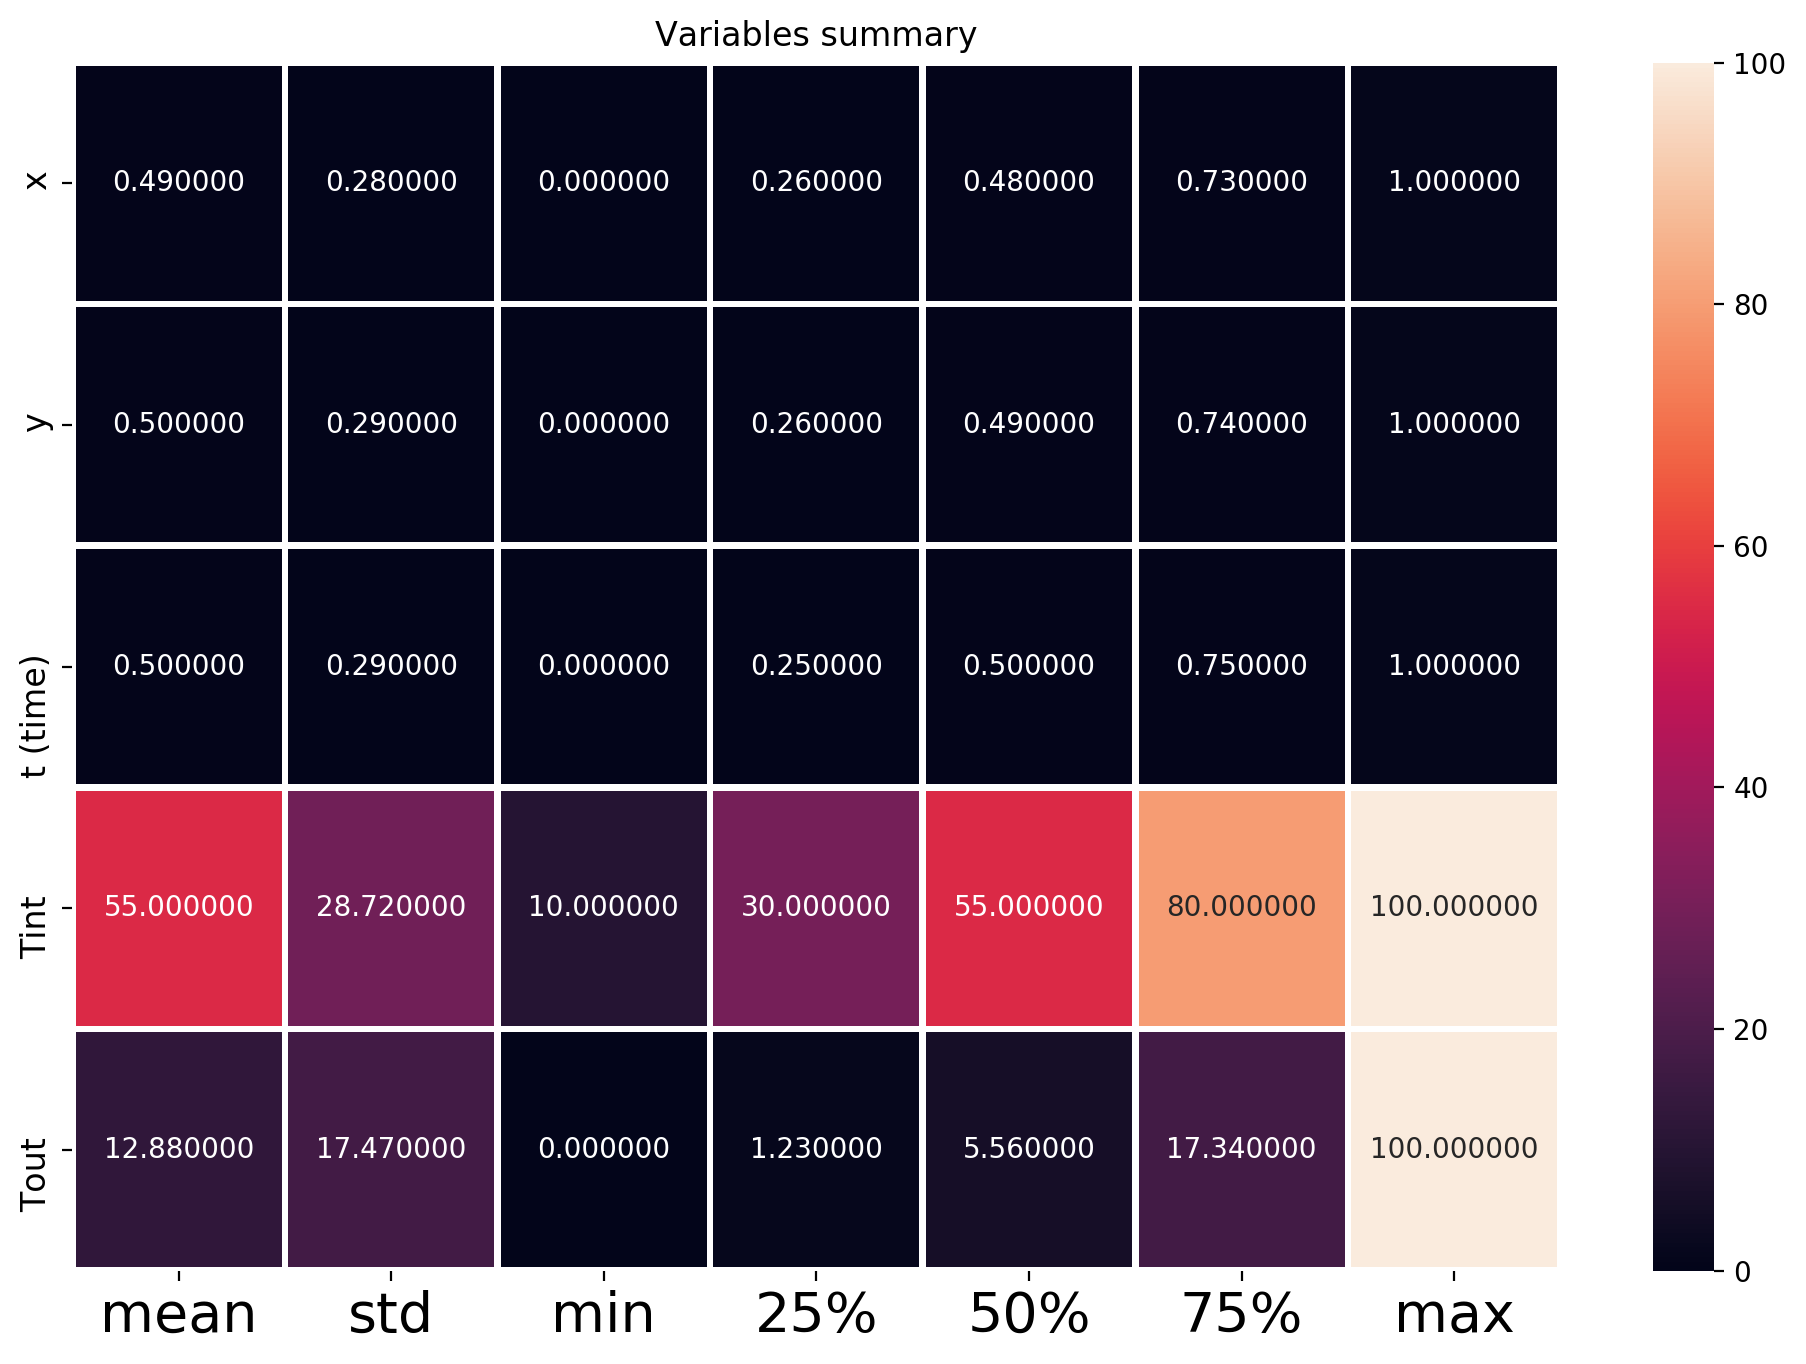

Correlation:


x             y      t (time)          Tint      Tout
x         1.000000e+00 -5.132073e-03 -6.651063e-18 -2.846936e-20 -0.662216
y        -5.132073e-03  1.000000e+00 -1.011152e-17  1.703250e-20  0.022315
t (time) -6.651063e-18 -1.011152e-17  1.000000e+00 -7.803094e-18  0.086578
Tint     -2.846936e-20  1.703250e-20 -7.803094e-18  1.000000e+00  0.385241
Tout     -6.622156e-01  2.231471e-02  8.657826e-02  3.852415e-01  1.000000

In [12]:
plt.figure(figsize=(12,8), dpi=200)
sb.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

print('Correlation:')

data.corr(method='pearson')


Due to the large size of dataset (10763570 rows of data samples), we choose a reduced random sample of the dataset


In [14]:
sampled_data=data.sample(n=100000, random_state=0)


In the next step, we define the input and output of the model

In [15]:
Output= sampled_data.Tout
Input = sampled_data.drop('Tout', axis=1)
X=Input
y=Output

In [17]:
# Description of data
des=sampled_data.describe()
description=pd.DataFrame(des)
description

x              y       t (time)           Tint  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.494177       0.497808       0.499232      55.009500   
std         0.285211       0.287241       0.291740      28.739592   
min         0.000000       0.000000       0.000000      10.000000   
25%         0.261540       0.258498       0.250000      30.000000   
50%         0.482090       0.493845       0.500000      50.000000   
75%         0.733813       0.738585       0.750000      80.000000   
max         1.000000       1.000000       1.000000     100.000000   

                Tout  
count  100000.000000  
mean       12.909513  
std        17.507653  
min         0.000000  
25%         1.214091  
50%         5.546427  
75%        17.487065  
max       100.000000

Data information

In [18]:
# Data information
inf=sampled_data.info()
inf

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 116221 to 520136
Data columns (total 5 columns):
x           100000 non-null float64
y           100000 non-null float64
t (time)    100000 non-null float64
Tint        100000 non-null float64
Tout        100000 non-null float64
dtypes: float64(5)
memory usage: 4.6 MB


To have a better insight into the dataset, we perform a data exploration on the dataset

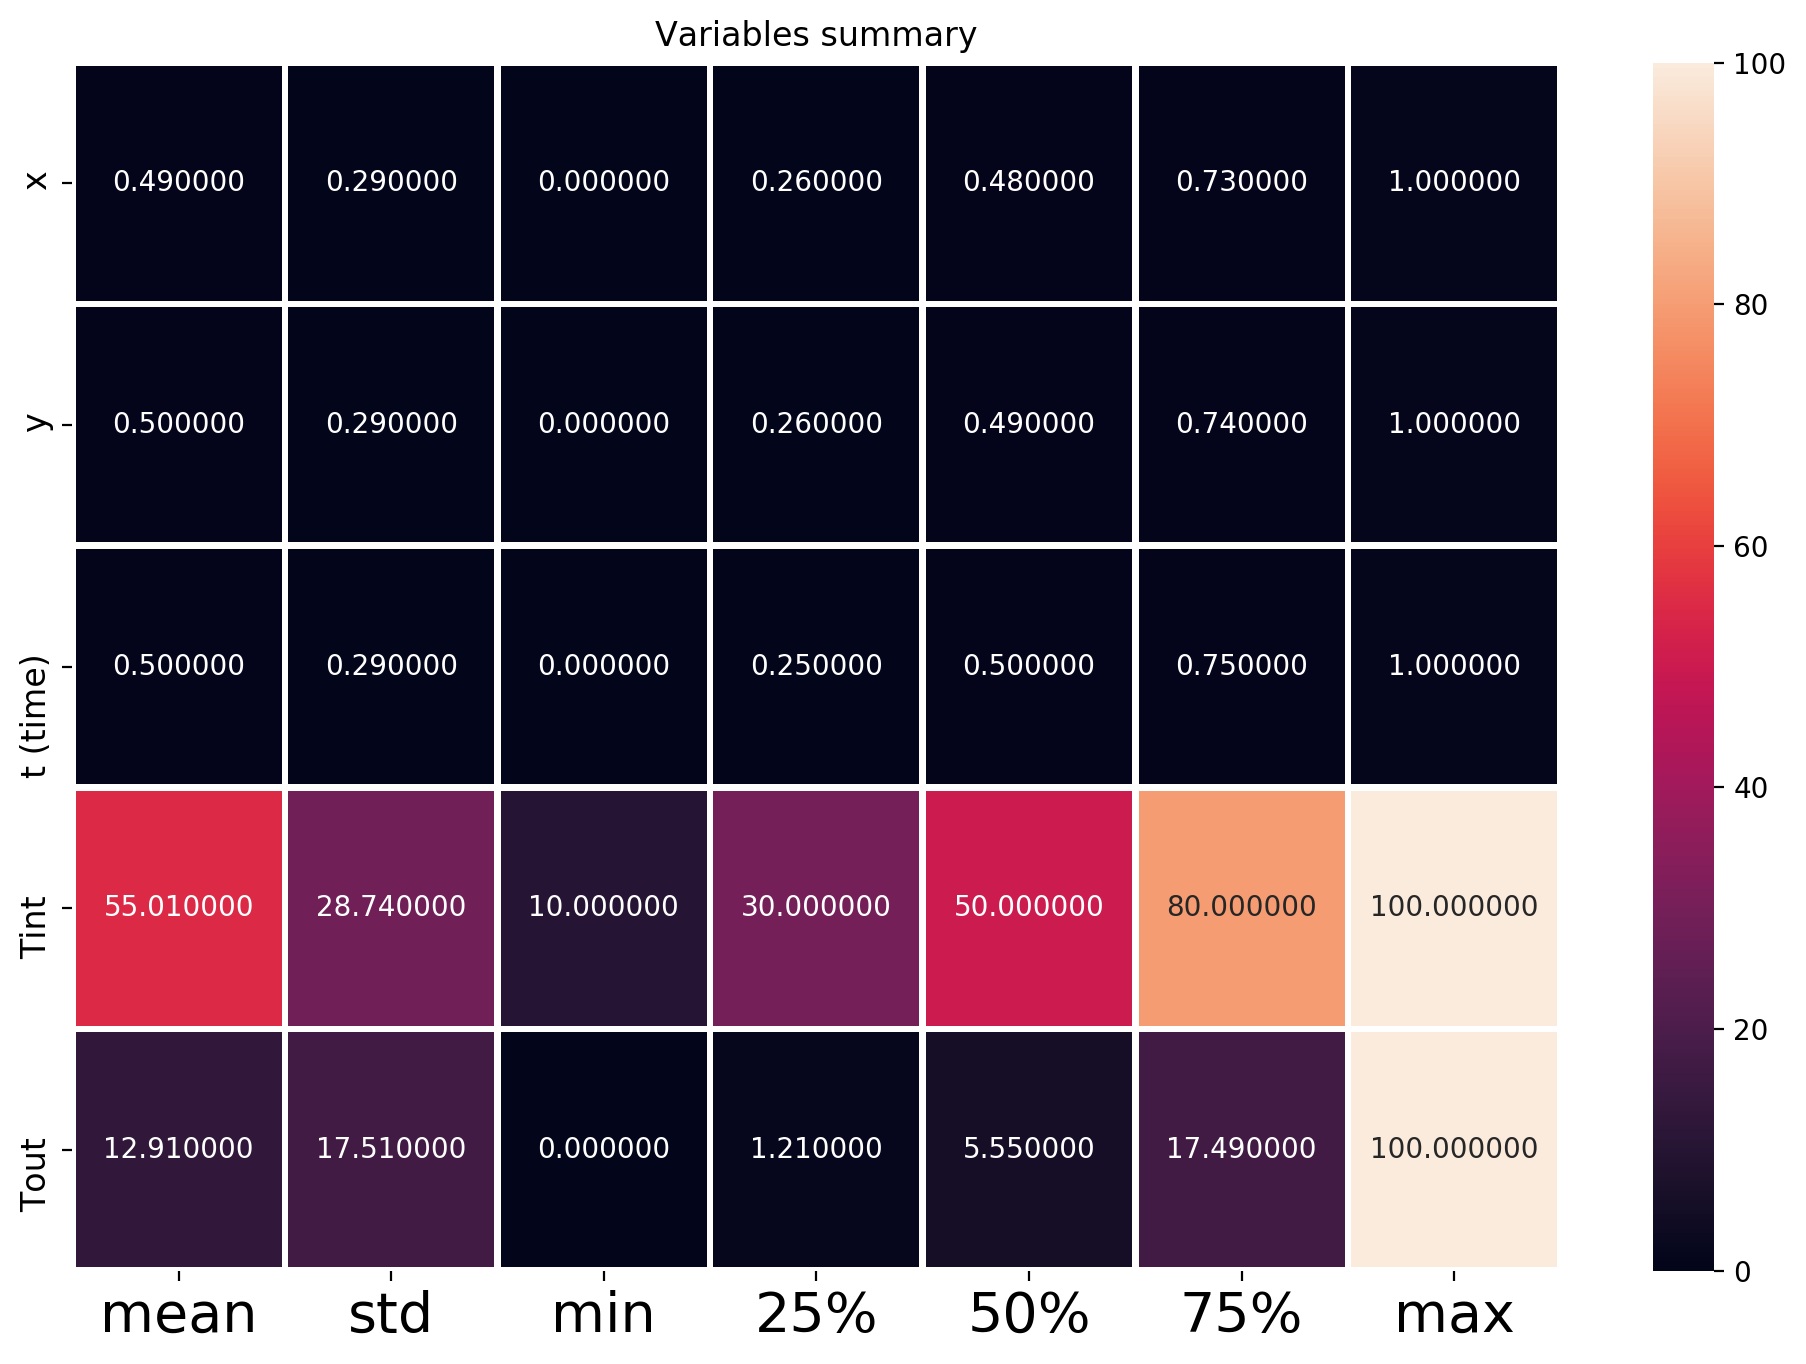

Correlation:


x         y  t (time)      Tint      Tout
x         1.000000 -0.004169 -0.008623 -0.004368 -0.664304
y        -0.004169  1.000000 -0.000439 -0.001907  0.022868
t (time) -0.008623 -0.000439  1.000000  0.002263  0.095119
Tint     -0.004368 -0.001907  0.002263  1.000000  0.384577
Tout     -0.664304  0.022868  0.095119  0.384577  1.000000

In [23]:
plt.figure(figsize=(12,8), dpi=200)
sb.heatmap(round(sampled_data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

print('Correlation:')

sampled_data.corr(method='pearson')


Pair Plot:


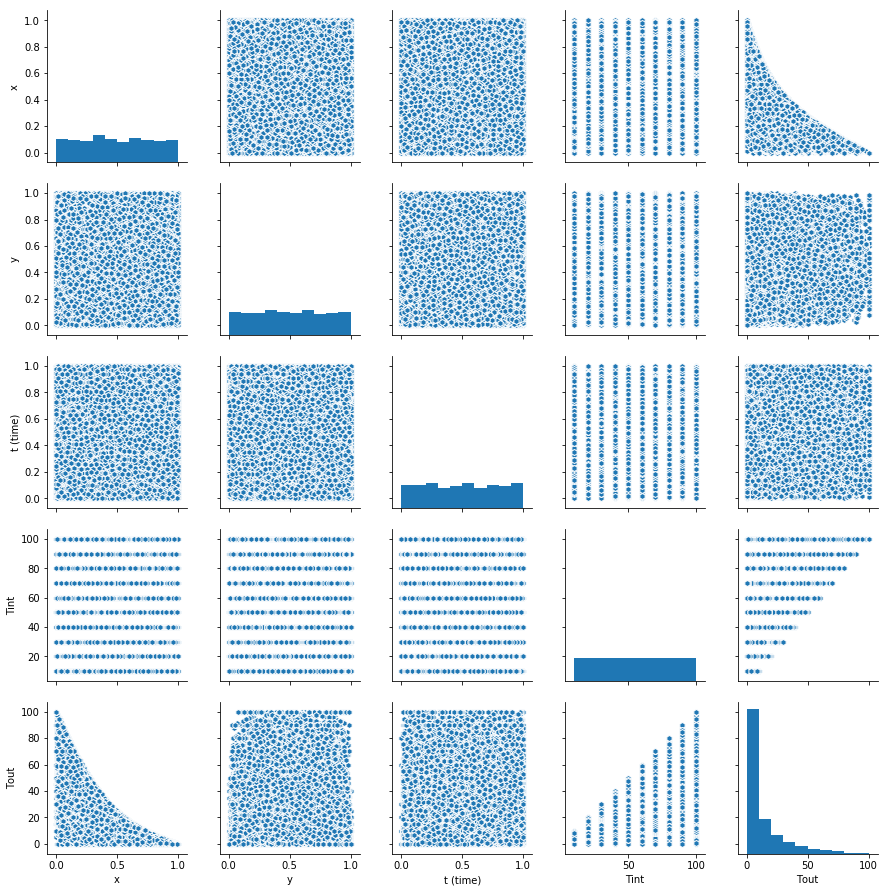

<Figure size 3600x3600 with 0 Axes>

In [25]:
# Pair plot between variables
sb.pairplot(sampled_data,markers="h")
print('Pair Plot:')
plt.figure(dpi=300, figsize=(12,12))
plt.show()



In this stage, we split the data into training and testing subsets (30 % of the data is allocated for testing)

In [151]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=0)

For convenience, a function is defined to run the model and print the associated error using different error metrics

In [152]:
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    RMSE=np.sqrt(mean_squared_error(dtesty,prediction))
    MAE=mean_absolute_error(dtesty, prediction)
    MSE = metrics.mean_squared_error(y_test, prediction)
    print ("MEAN SQUARED ERROR (MSE) :", MSE )   
    print ("***************************************************************************")
    print ("ROOT MEAN SQUARED ERROR (RMSE) :", RMSE )
    print ("***************************************************************************")

    
    print ("MAE is: ", MAE )
    print ("***************************************************************************")

    
    print ("R-Squared is: ", r2_score(dtesty, prediction) )
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)

#     cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=2,scoring="neg_mean_squared_error")
#     cross_val = cross_val.ravel()
#     print ("CROSS VALIDATION SCORE")
#     print ("************************")
#     print ("cv-mean :",cross_val.mean())
#     print ("cv-std  :",cross_val.std())
#     print ("cv-max  :",cross_val.max())
#     print ("cv-min  :",cross_val.min())
    
    plt.figure(dpi=300, figsize=(12,12))
    plt.subplot(211)
    
    testy = dtesty.reset_index()["Tout"]
        
    ax = testy.plot(label="Observed",linewidth=1, color = "Blue", linestyle="-.")
    ax = prediction[0].plot(label = "Predictions",linewidth=1,  color = "Green")

    plt.title("GBR Model",  fontsize=20)
    plt.legend(loc=0, prop={'size': 15}, ncol=4)
    plt.xlabel("Test Sample Index", fontsize=15)
    plt.ylabel("Output Value (Temperature)", fontsize=15)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_facecolor("w")
    plt.figure(figsize=(12,12))
#     plt.subplot(211)
    
    if of_type == "coef":
        plt.figure(dpi=300, figsize=(12,12))
        coef = pd.DataFrame(algorithm.coef_.ravel())
        coef["feat"] = dtrainx.columns
        ax1 = sns.barplot(coef["feat"],coef[0], palette="dark",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        
        ax1.set_facecolor("white")
        sns.set_style('whitegrid')
        ax1.axhline(0,color="k",linewidth=2)
        ax2.tick_params(axis='both', labelsize=12)
        plt.ylabel("Feature Importance", fontsize=15)
        plt.xlabel("Features", fontsize=15)
        plt.title('FEATURE IMPORTANCES')
        plt.figure(dpi=300, figsize=(12,12))
    
    elif of_type == "feat":
        plt.figure(dpi=300, figsize=(12,10))
        coef = pd.DataFrame(algorithm.feature_importances_)
        coef["feat"] = dtrainx.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="deep",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        hatches =['/', '//', '+++', '---', 'xx', '\\', '***', 'oo', '/////', '....']
        for i,thisbar in enumerate(ax2.patches):
        # Set a different hatch for each bar
            thisbar.set_hatch(hatches[i])
        ax2.set_facecolor("white")
        ax2.axhline(0,color="k",linewidth=2)
        ax2.tick_params(axis='both', labelsize=12)
        sns.set_style('whitegrid')
        plt.ylabel("Feature Importance", fontsize=15)
        plt.xlabel("Features", fontsize=15)
        plt.title('FEATURE IMPORTANCES')
        plt.figure(dpi=300, figsize=(12,10))
        handles, labels = ax2.get_legend_handles_labels()
        ax2.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=10, fancybox=True, shadow=True)

import warnings
warnings.filterwarnings("ignore")

Now, we run the desired regression algorithm. Here, gradient boosting regression is used.

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=1, warm_start=True)
***************************************************************************
      Iter       Train Loss   Remaining Time 
         1         266.8843            2.86s
         2         231.6184            3.03s
         3         202.7893            2.90s
         4         178.9049            2.70s
         5         158.7380            2.61s
         6         141.7300            2.48s
         7         127.9524            2.45s
         8         116.0078            2.40s
         9         106.0611            2.49s
        10          97

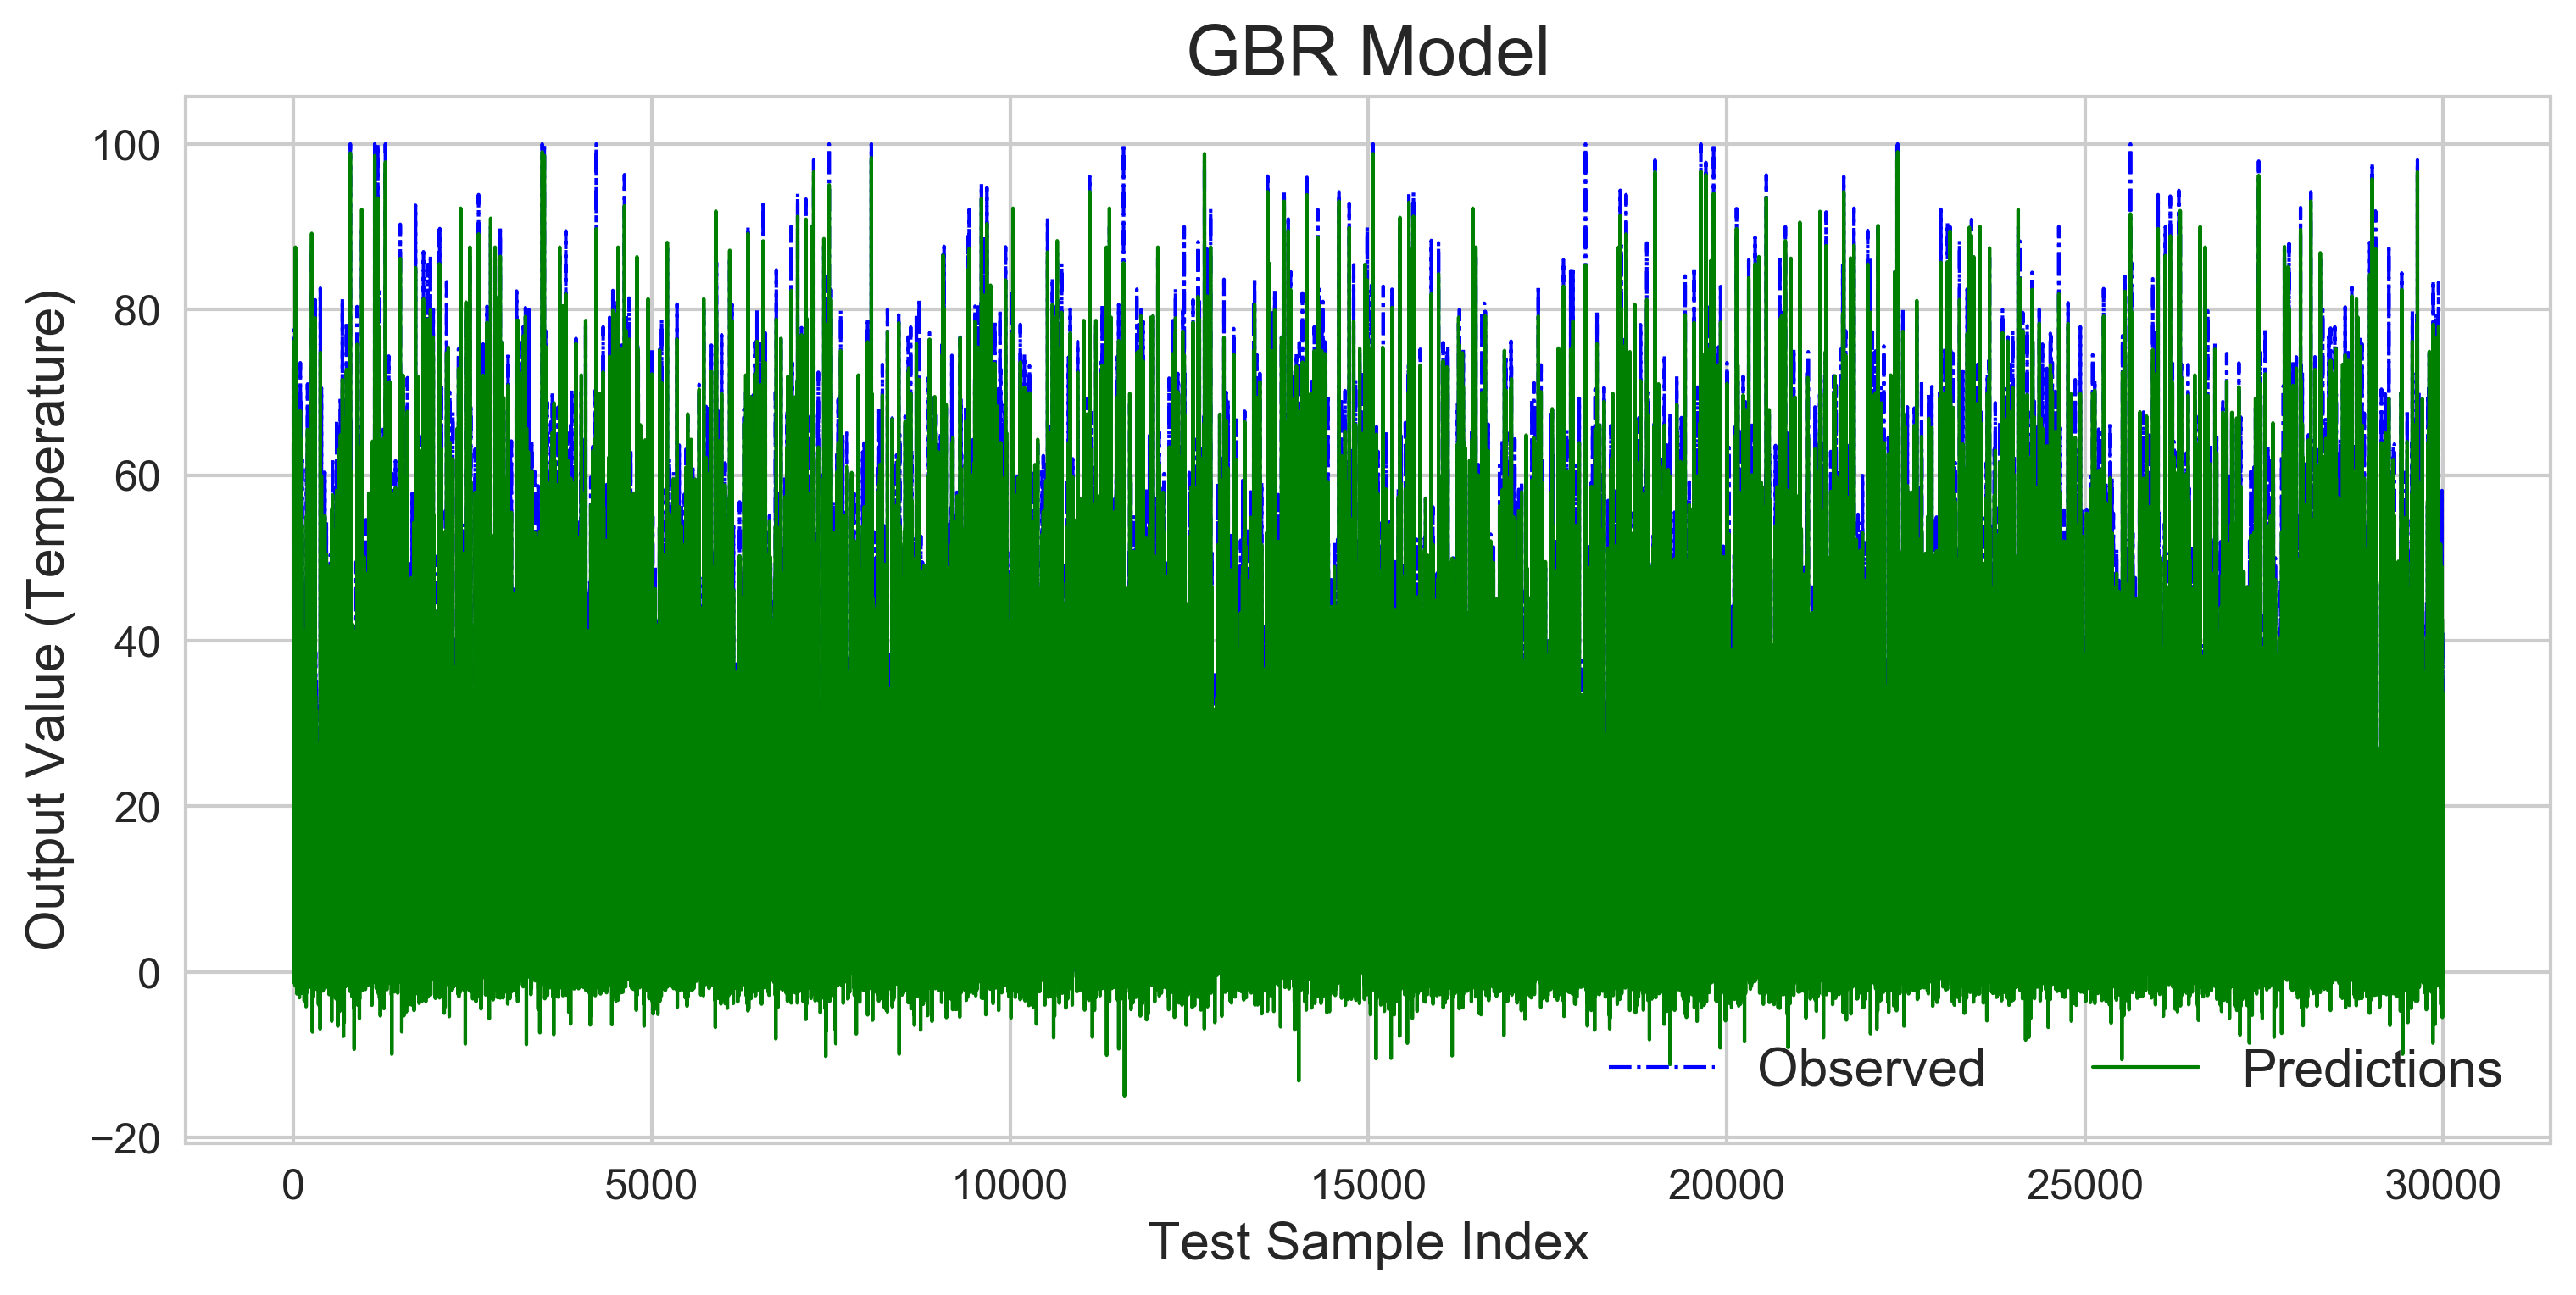

<Figure size 3600x3600 with 0 Axes>

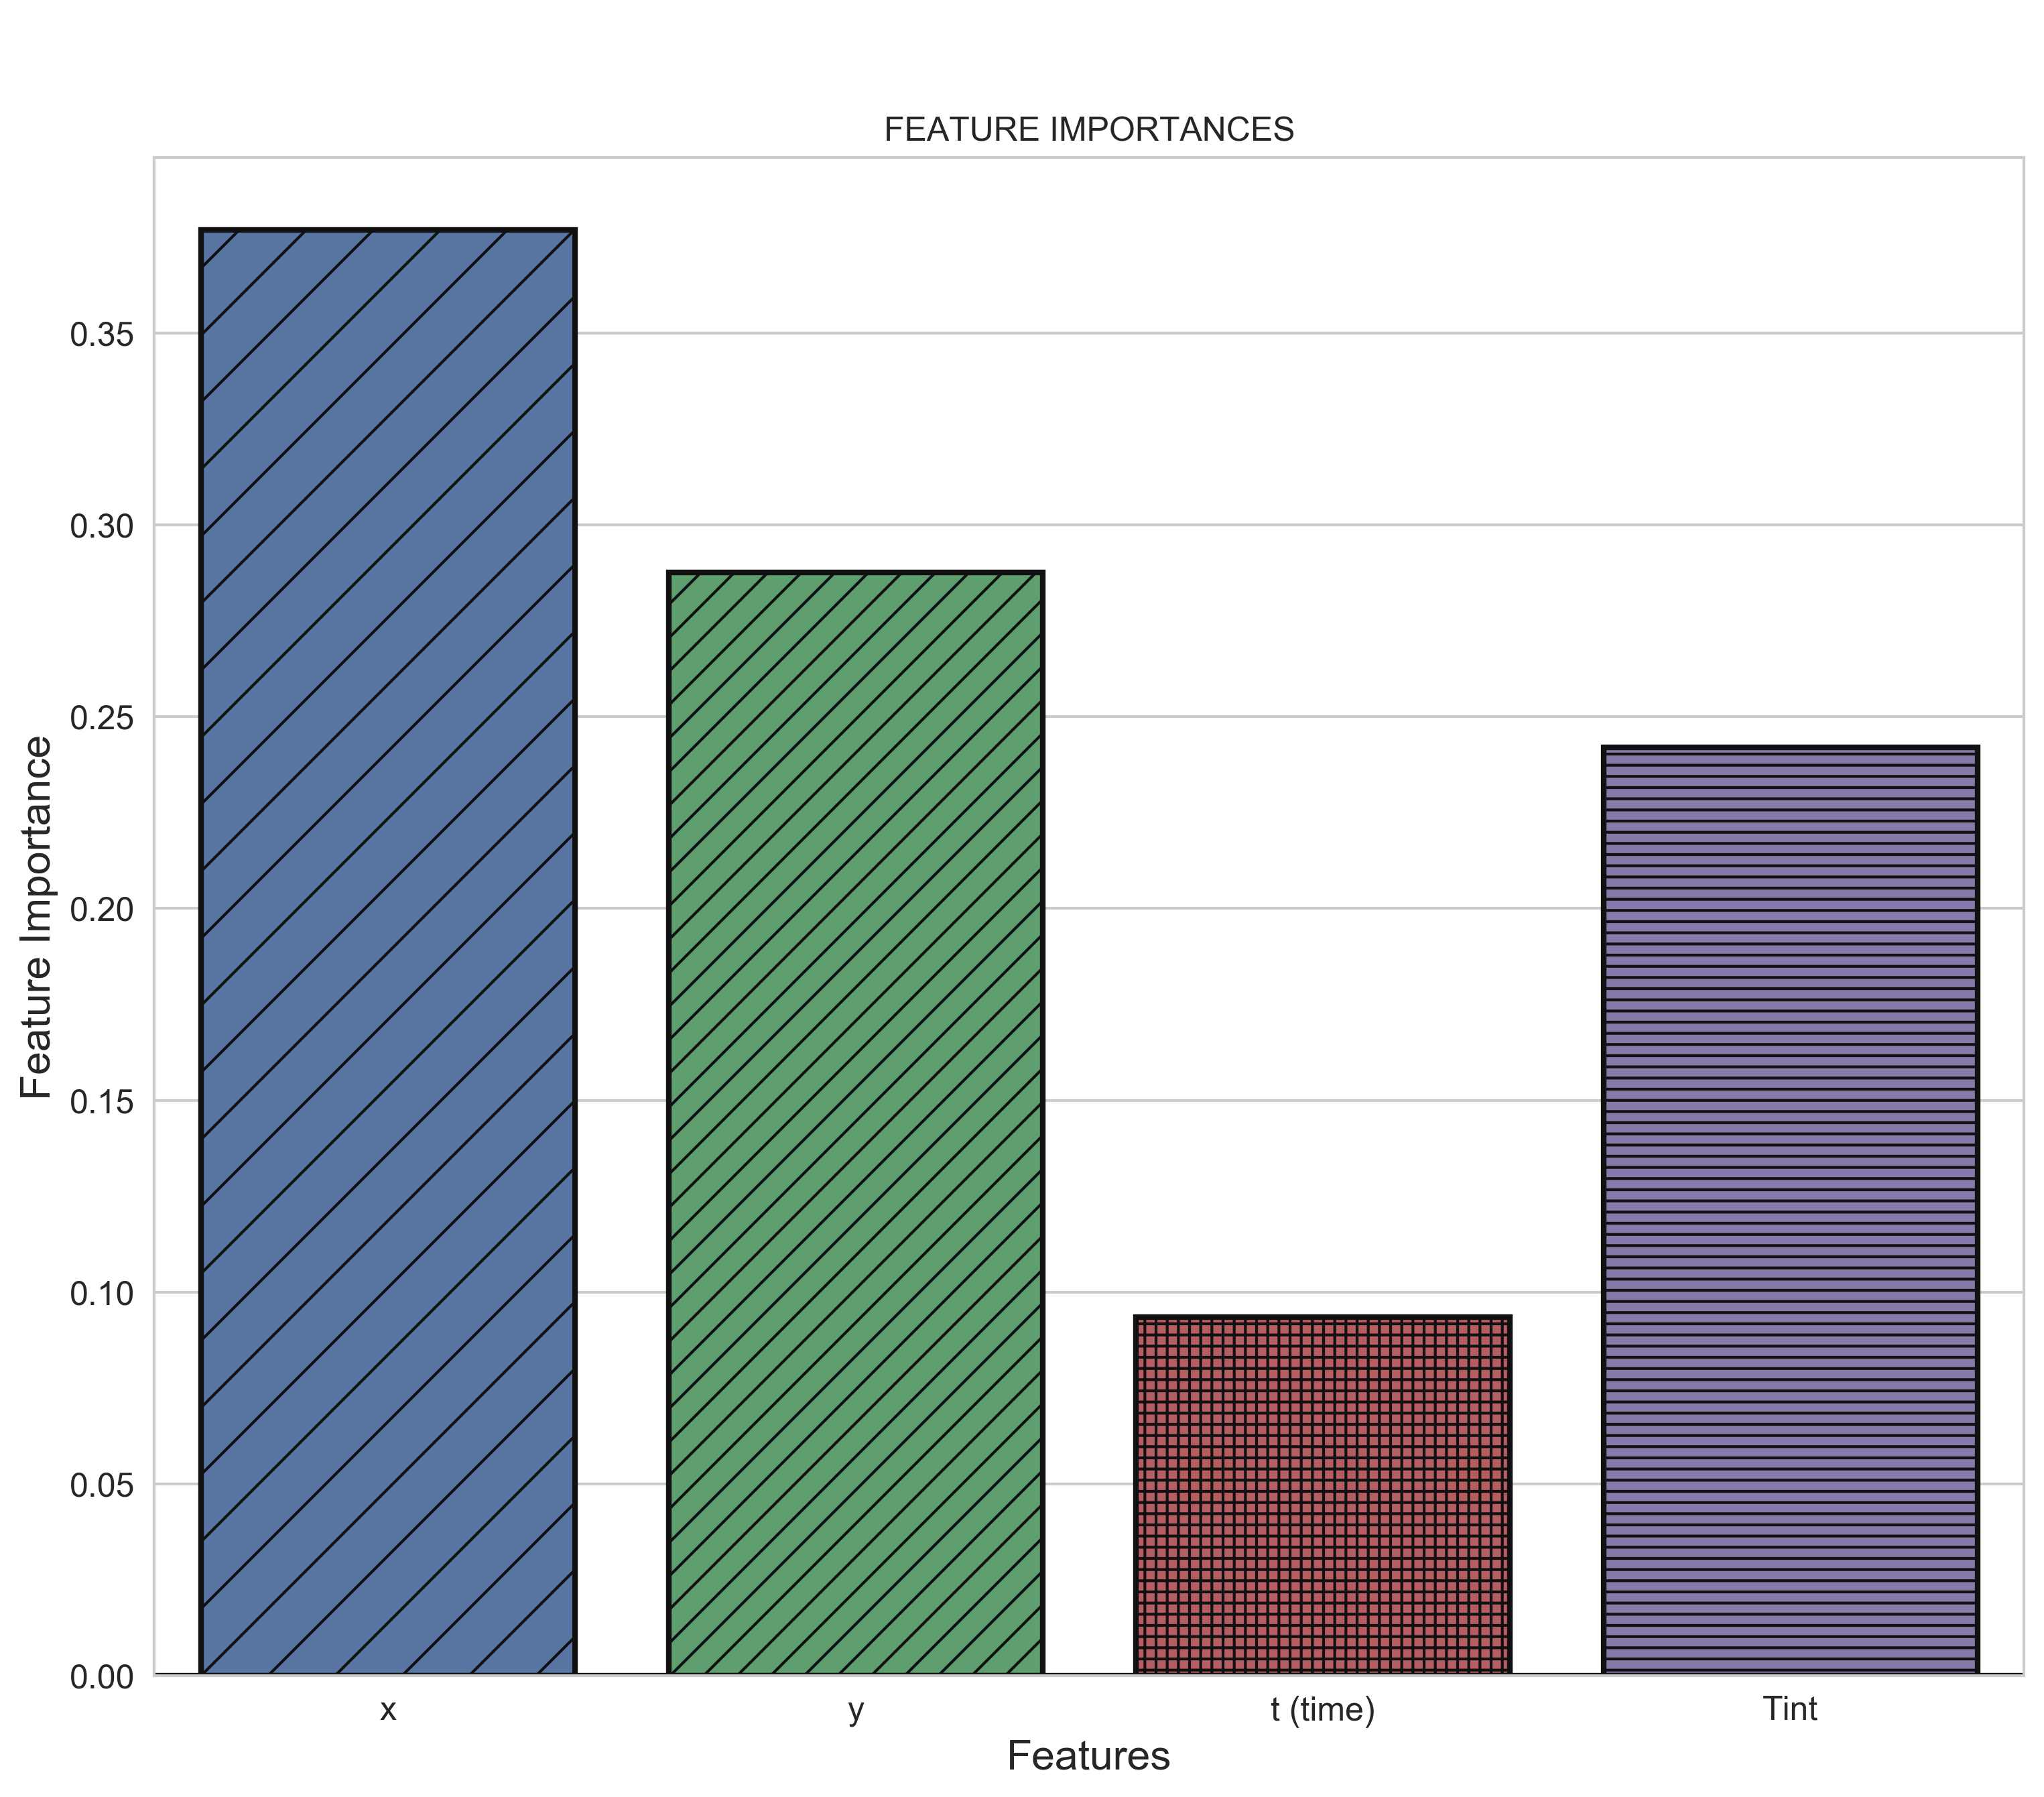

<Figure size 3600x3000 with 0 Axes>

In [153]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
gbr = GradientBoostingRegressor(random_state=0, warm_start=True, verbose=1)
model(gbr,X_train,y_train,X_test,y_test,"feat")
prediction_test = gbr.predict(X_test)
prediction_train=gbr.predict(X_train)


Now, we visualize the temperature of the train points in the given domain based on the real observations and the predictions

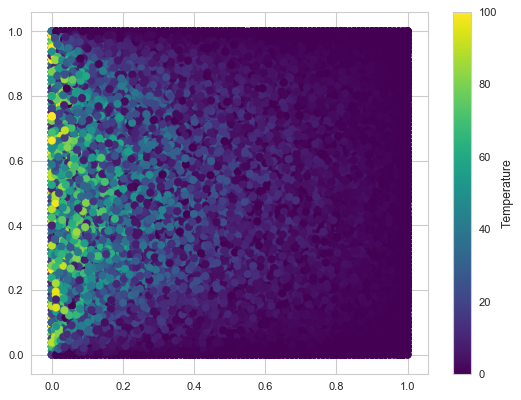

In [155]:
# plot of the temperature of the points using real observations from the dataset
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
plt.scatter(X_train.x, X_train.y, c=y_train, s=50, cmap='viridis')
lab = plt.colorbar()
lab.set_label("Temperature")

In [156]:
p2=pd.DataFrame({'y_pred': prediction_train})


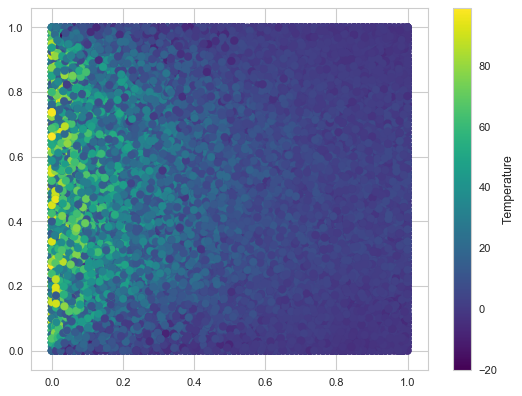

In [157]:
# plot of the temperature of the points using prediction from GBR model
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
plt.scatter(X_train.x, X_train.y, c=p2.y_pred, s=50, cmap='viridis')
lab = plt.colorbar()
lab.set_label("Temperature")

In [158]:
diff=y_train - prediction_train
p3=pd.DataFrame({'diffe': diff}, dtype='float64')


Plot the error (the difference between observed and predicted values of temperature)

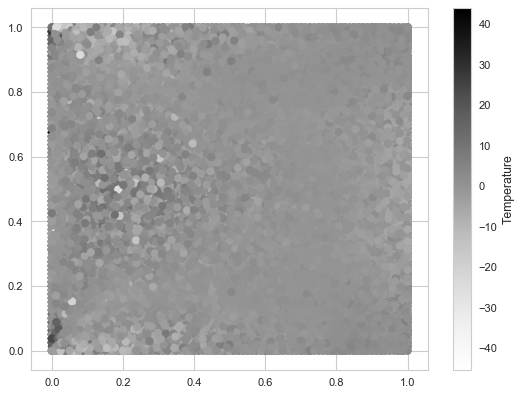

In [160]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
plt.scatter(X_train.x, X_train.y, c=p3.diffe, s=50, cmap='Greys')
lab = plt.colorbar()
lab.set_label("Temperature")


In [161]:
estimation_cs = pd.DataFrame({'Actual T': y_test, 'Estimated T':prediction_test})
estimation_cs.head(40)

Actual T  Estimated T
54292   73.031056    63.772029
339021   8.297834     8.543513
91397    3.428970     5.182234
57521    7.763267    10.387818
3851    44.863202    44.271736
67221   77.534140    76.174103
412912   1.022165     1.972505
75744    1.942038     3.303012
489322  31.676852    28.056366
298759  17.651184    16.655702
364368  19.018861    19.081086
430993   0.471521    -1.324408
26697    0.803746     0.672087
217106   1.786422     1.563375
77010    6.009146     6.028650
49122   17.716678    17.233129
62866   22.210734    22.025592
197655   3.437474     4.133616
296639  36.935518    32.590817
291447   0.358337    -0.605983
116315   0.161167    -0.948205
460174   1.501716     1.884480
483208  22.038297    23.373616
395999  16.217690    16.798094
99056    0.139077    -1.635481
102588  14.692192    15.354872
423270  17.659729    18.819000
51541    1.306887     1.044204
448724  86.530371    87.533590
176717  26.871347    23.469245
134013   4.024439     4.183449
135442   1.256403     3.581758
476975  12.272469    14.941864
319346   6.781008     7.164652
65034    2.823520     3.349990
310345   2.185788     2.083643
108601  34.007922    33.078683
259311  23.557283    24.094053
484235   1.604692     2.714581
75408   85.875210    78.045686

In [162]:
estimation_cs = pd.DataFrame({'Actual T': y_train, 'Estimated T':prediction_train})
estimation_cs.head(120)

Actual T  Estimated T
505434  41.984393    37.802229
276038  20.512968    19.594387
7937     5.430014     7.104978
388416   0.063238    -1.978359
180338   7.036268    10.304082
58405   24.882910    26.580031
195666  11.230184    10.700533
486240   6.131504    11.731510
420191  74.538308    72.235229
537557   0.593540    -0.062486
471522   8.571344     8.287170
273063  17.203594    15.569273
375237   6.072301     6.864801
348066   6.439011    10.208586
43821    0.259199    -7.246423
519798  61.135608    61.655544
17089    0.644167    17.993435
324795  23.519841    23.602405
346299   3.542273     6.840033
328386   7.977107     7.696758
178510   7.190899    10.402170
132630   2.675651     3.428778
392378   8.988812     8.306472
155404   5.210956     6.962852
345558   0.213365    -0.976299
147497   4.846629     6.182984
495279  30.304489    29.177262
183552  29.436358    25.504574
348013   0.663427     0.616001
116277   0.414476     1.866652
...           ...          ...
188136   3.950533     4.071295
276373  21.175780    20.008708
520269   6.363365     6.244822
486022  11.420831    11.484753
263743   4.178237     6.721470
420462   1.303176     1.662120
404842   1.874410     3.813429
341570  56.117521    48.063190
99706   53.543234    50.001824
41613    1.506517     4.526409
36353    1.380867     1.928972
334568   6.001625     6.031903
189186  13.536138    20.716938
260305   0.697859     1.575454
80347   60.194908    52.386192
10984    1.347982     0.469060
61420    0.000431    -3.687022
62945    0.004307    -1.485053
146741   0.485694     0.487675
431239   0.145901    -0.322531
373968   3.768980     5.757878
320225  12.452199    12.901609
44753    0.000093    -3.359135
111730   0.939520     6.397219
221019   2.803102     2.585125
330246  10.078889    10.635451
444136  40.738812    38.748052
460213   9.620840    10.898116
377095   1.334663     0.707537
350315  25.637346    22.325975

[120 rows x 2 columns]

Now, to improve the prediction accuracy, we try to tune some parameters of the GBR model using RandomizedSerachCV along with cross validation

In [81]:
# RandomizedSearchCV with Cross Validation

from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 5000, num = 11)]

# Learning Rate
learning_rate= [np.float(x) for x in np.linspace(start = 0.01, stop = 0.31, num = 6)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 2, stop =30, num = 30)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop =31, num = 30)]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

print(random_grid)


{'n_estimators': [1000, 1400, 1800, 2200, 2600, 3000, 3400, 3800, 4200, 4600, 5000], 'learning_rate': [0.01, 0.06999999999999999, 0.13, 0.19, 0.25, 0.31], 'min_samples_split': [2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31]}


In [82]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gbr2 = GradientBoostingRegressor(random_state =0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gbr2_random = RandomizedSearchCV(estimator=gbr, param_distributions=random_grid,
                              n_iter = 50, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=1, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gbr2_random.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 32.6min finished


      Iter       Train Loss   Remaining Time 
         1         234.2702            1.33m
         2         181.3587            1.24m
         3         145.9832            1.22m
         4         118.6549            1.22m
         5         100.2399            1.21m
         6          86.4857            1.23m
         7          75.6103            1.22m
         8          66.6395            1.20m
         9          59.6267            1.20m
        10          53.2458            1.20m
        20          24.1958            1.13m
        30          15.9177            1.12m
        40          12.0645            1.09m
        50           9.6121            1.08m
        60           8.2022            1.07m
        70           7.3311            1.08m
        80           6.4304            1.08m
        90           5.8097            1.07m
       100           5.3582            1.05m
       200           2.7751            1.01m
       300           1.9850           58.54s
       40

In [163]:
gbr2_random.best_params_

{'n_estimators': 5000,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'learning_rate': 0.19}

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.19, loss='ls', max_depth=3, max_features=4,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=6000, presort='auto', random_state=0,
             subsample=1.0, verbose=1, warm_start=True)
***************************************************************************
      Iter       Train Loss   Remaining Time 
         1         232.4334            3.59m
         2         179.3576            3.04m
         3         142.8720            2.82m
         4         116.8374            2.72m
         5          98.3123            2.59m
         6          84.5681            2.46m
         7          74.4078            2.35m
         8          65.4399            2.33m
         9          58.7755            2.28m
        10          52.

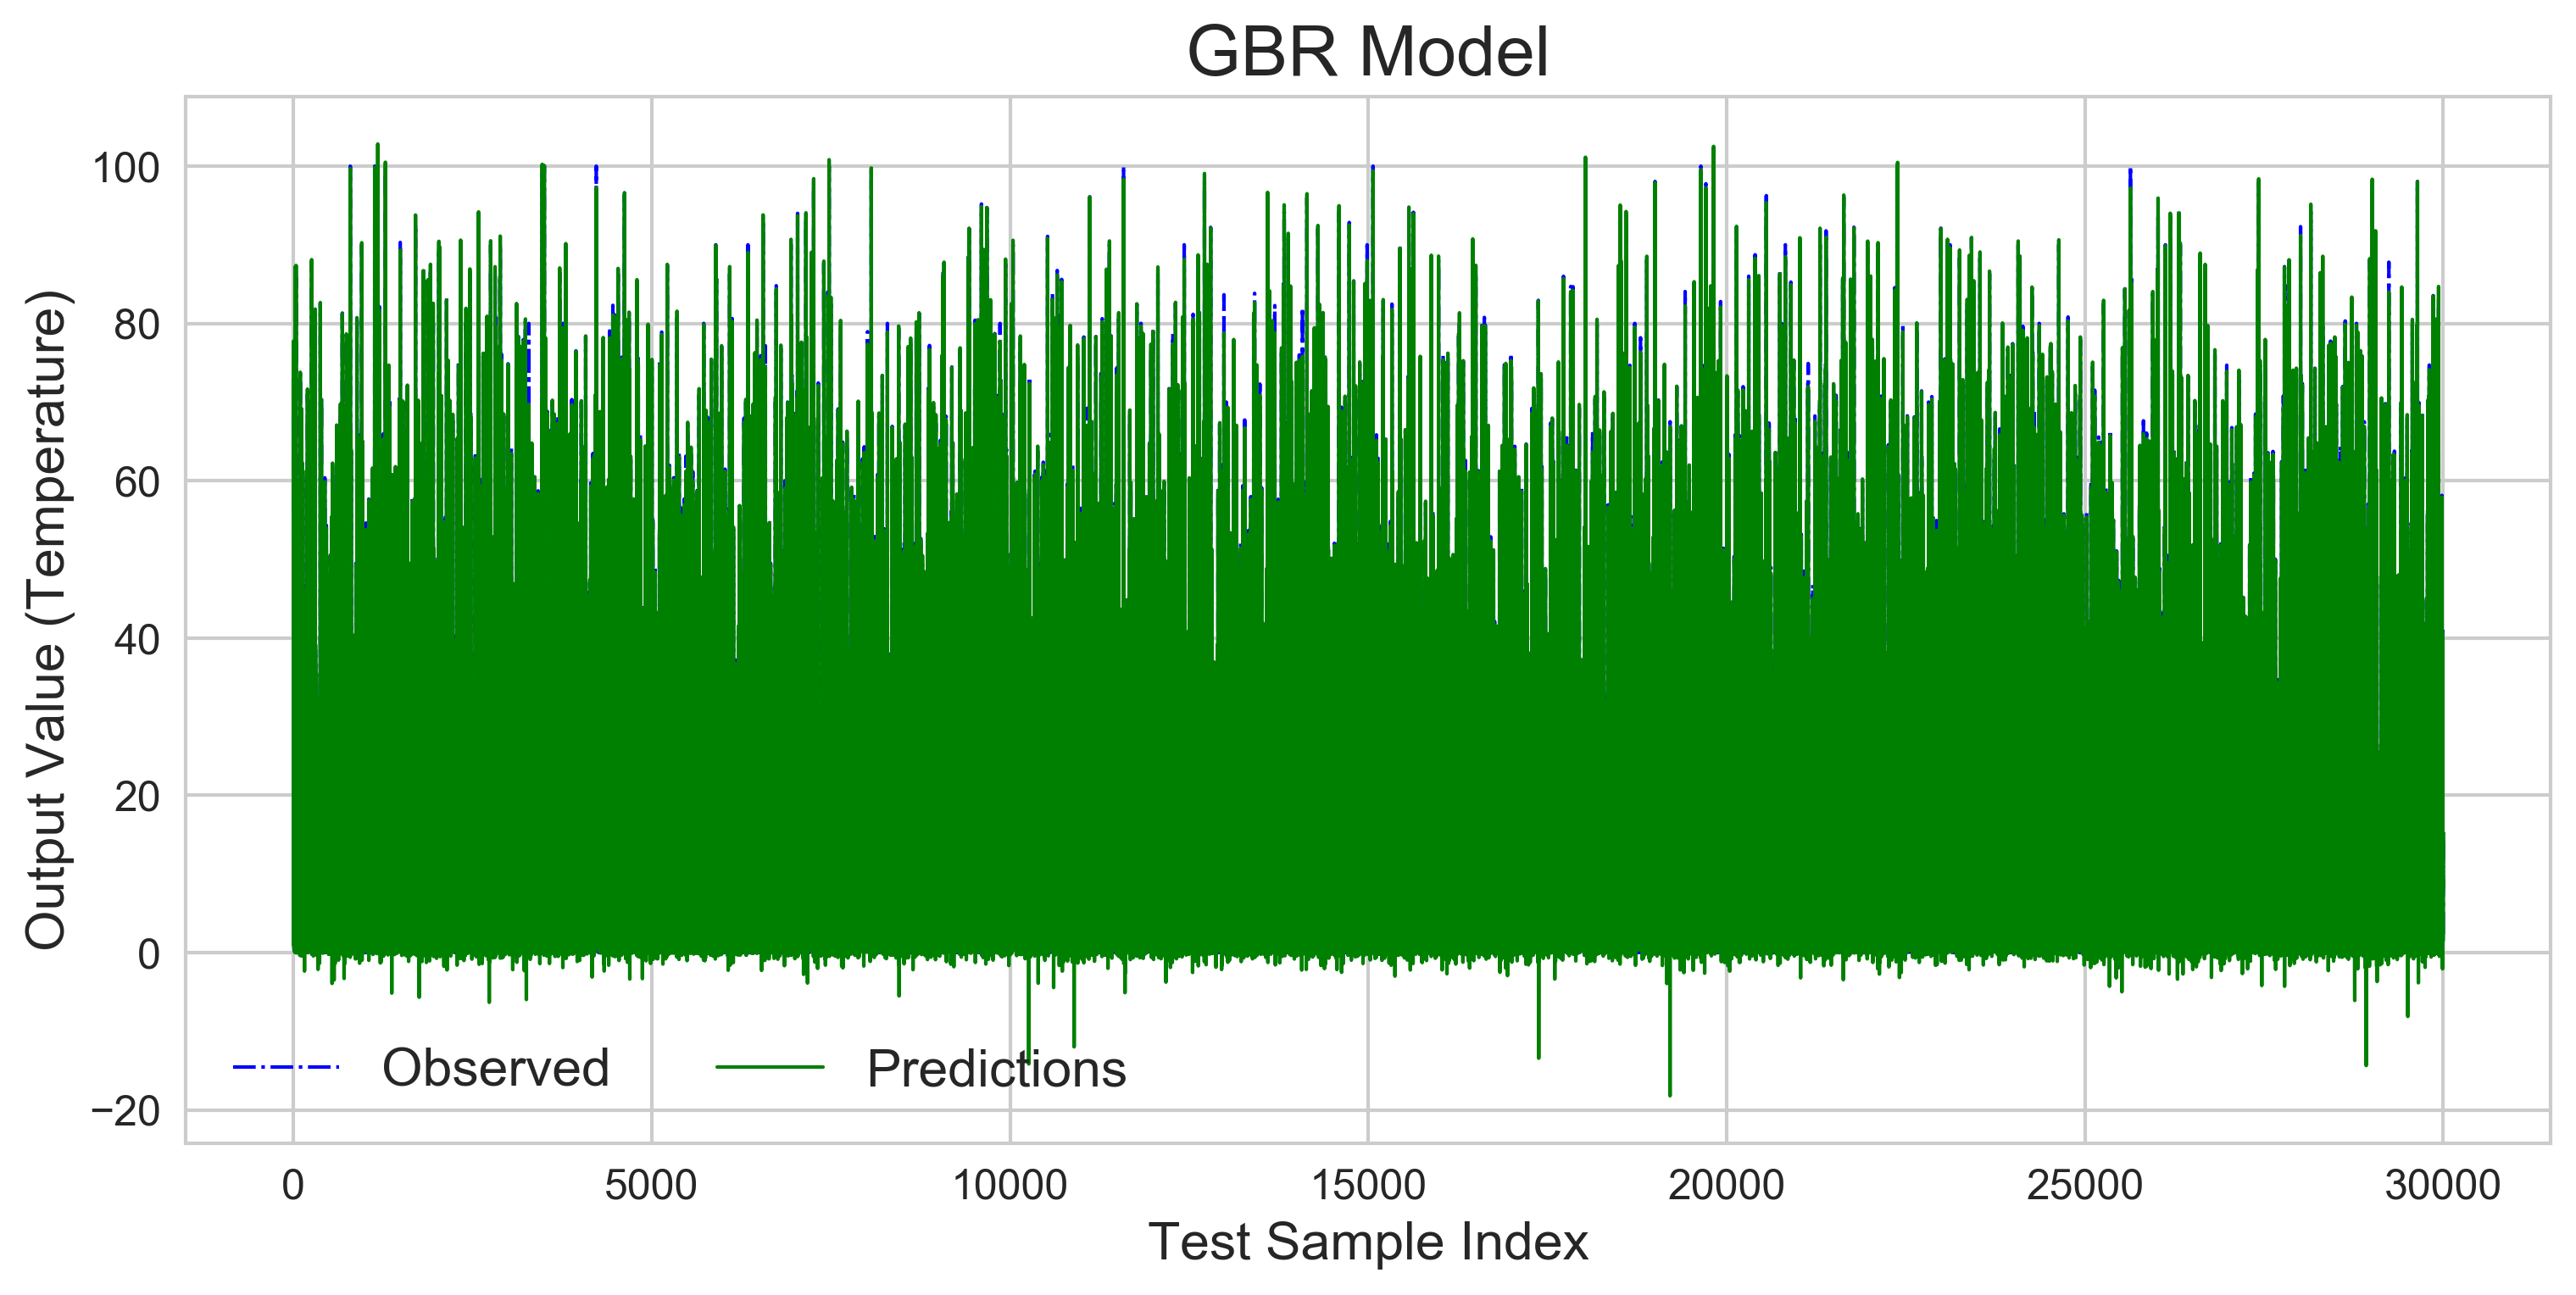

<Figure size 3600x3600 with 0 Axes>

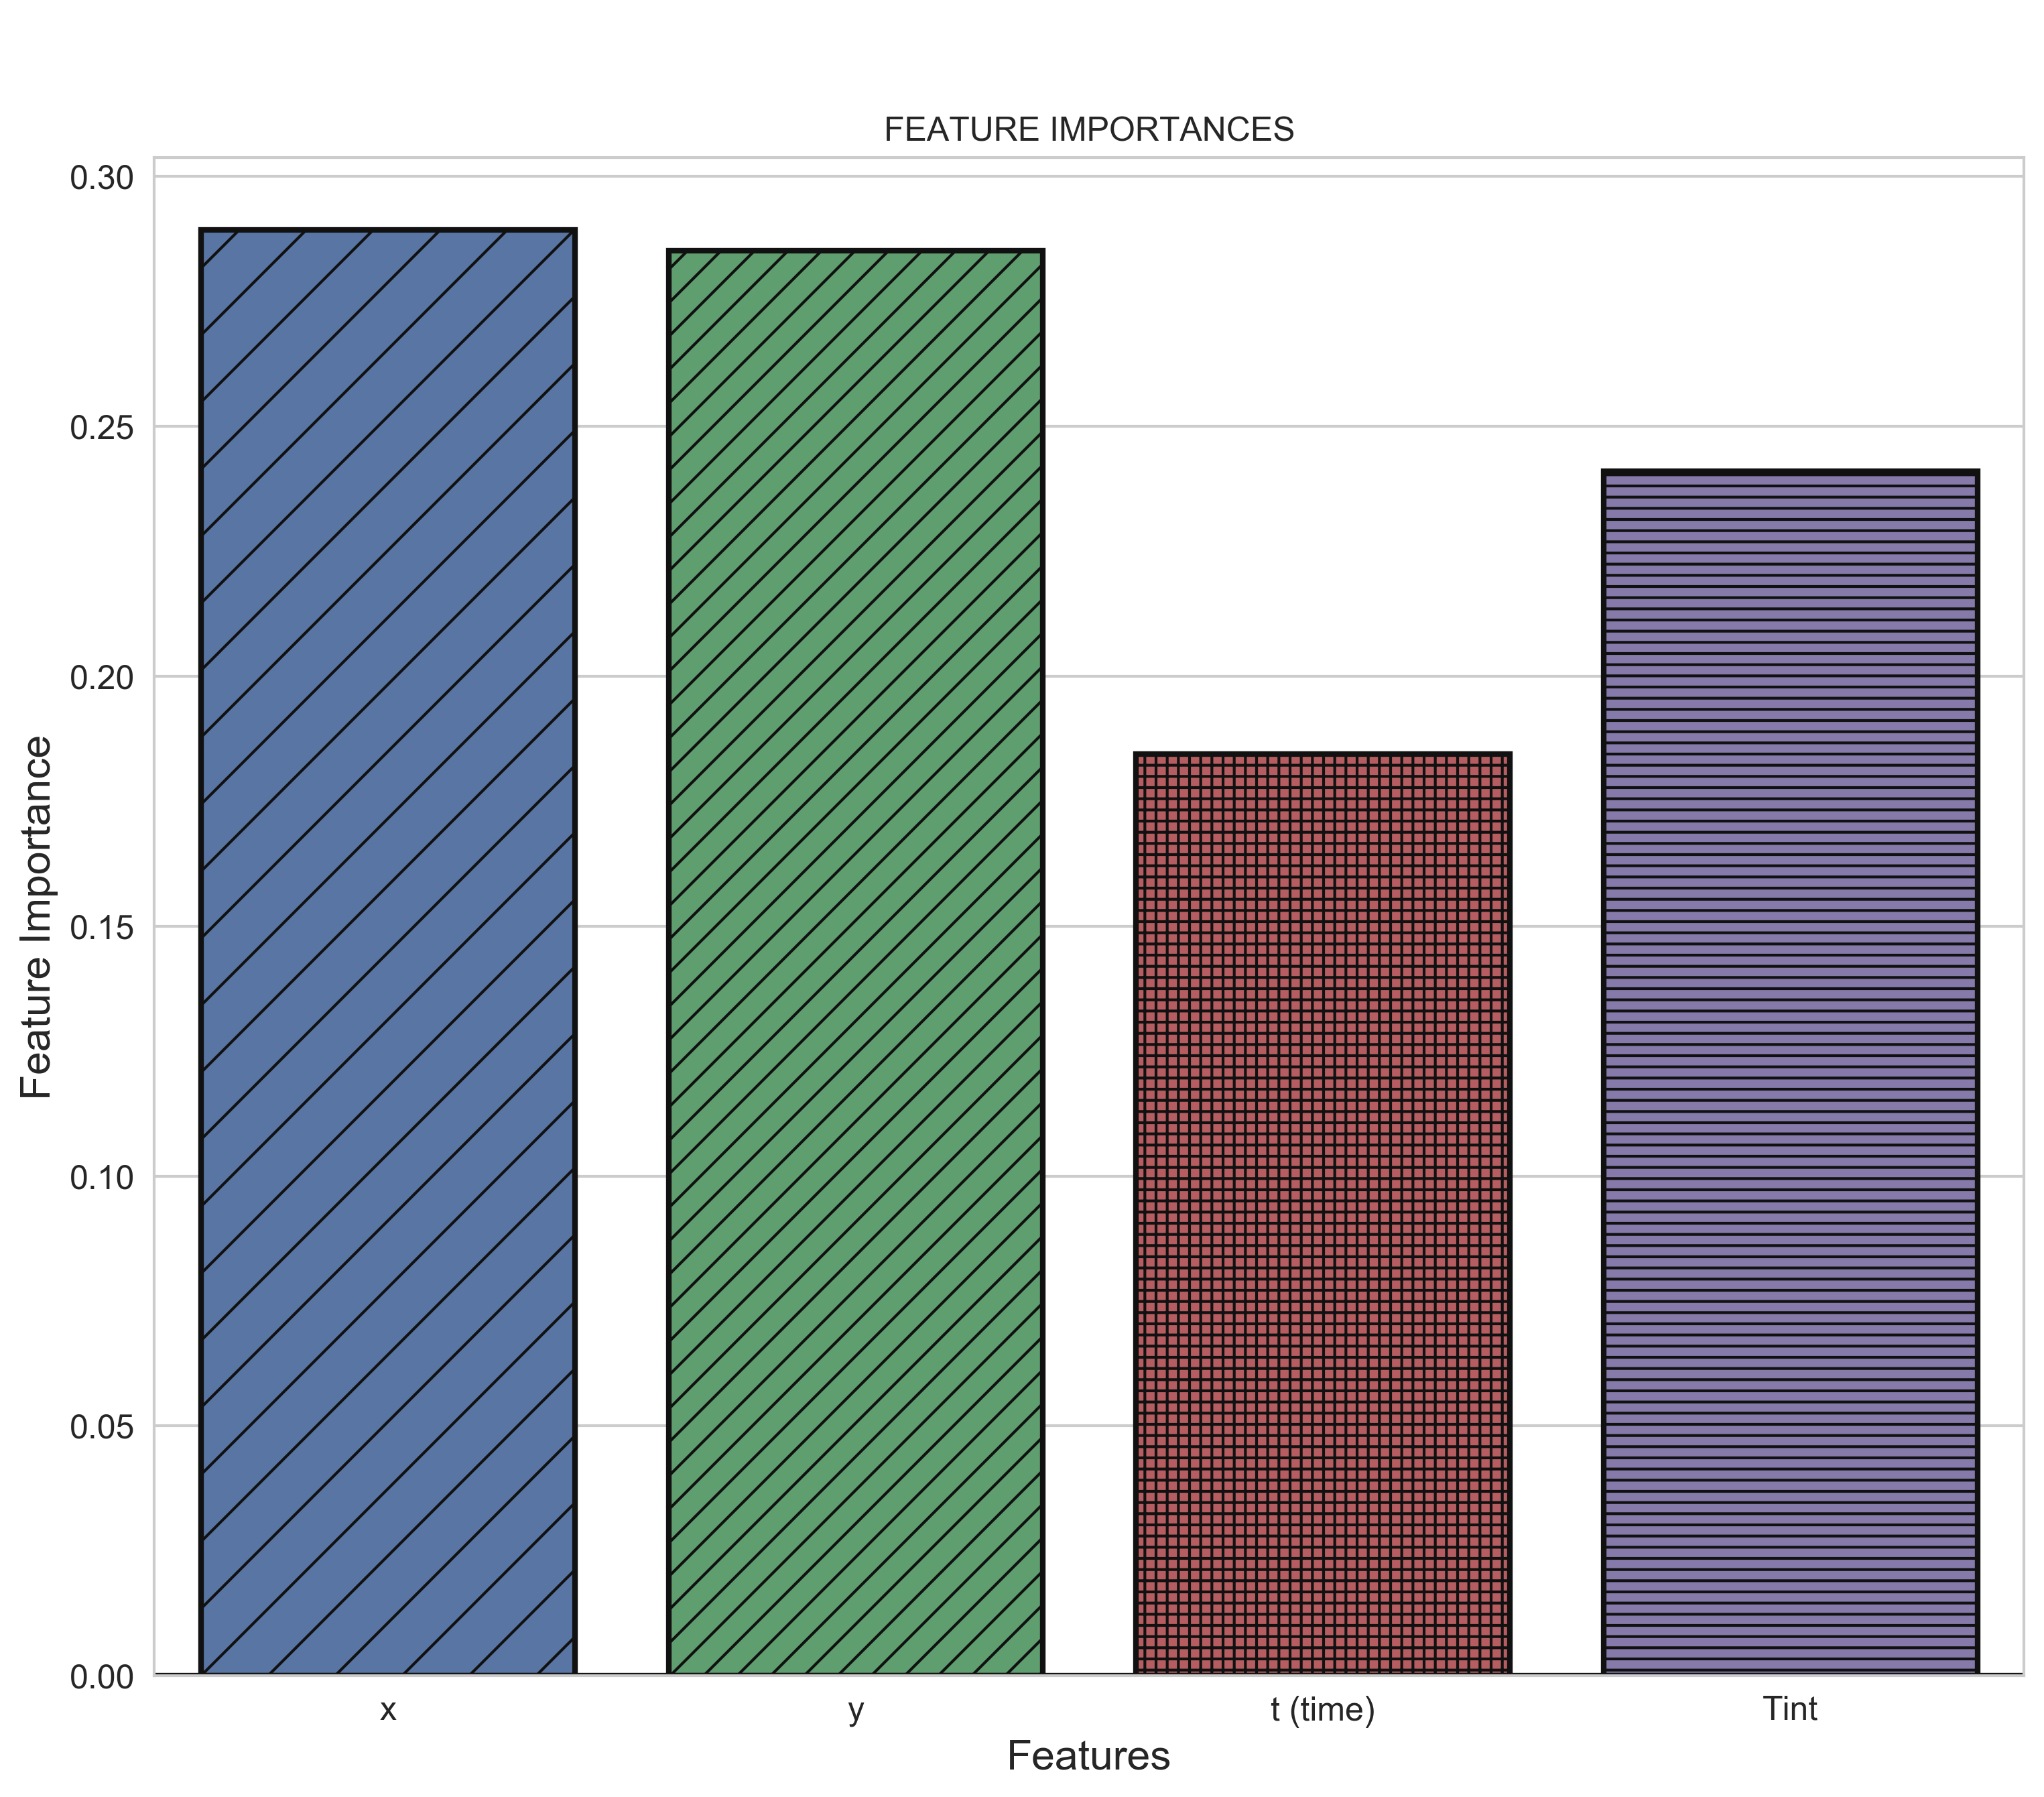

<Figure size 3600x3000 with 0 Axes>

In [164]:
gbr_tuned = GradientBoostingRegressor(n_estimators=6000, learning_rate=0.19, min_samples_split=4, min_samples_leaf=3, max_features=4, random_state=0, warm_start=True, verbose=1)
model(gbr_tuned,X_train,y_train,X_test,y_test,"feat")
prediction_test_tuned = gbr_tuned.predict(X_test)
prediction_train_tuned=gbr_tuned.predict(X_train)

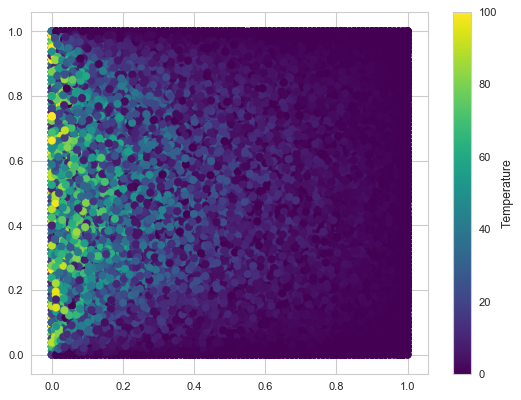

In [165]:
# plot of the temperature of the points using real observations from the dataset
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
plt.scatter(X_train.x, X_train.y, c=y_train, s=50, cmap='viridis')
lab = plt.colorbar()
lab.set_label("Temperature")

In [166]:
p2_tuned=pd.DataFrame({'y_pred_tuned': prediction_train_tuned})

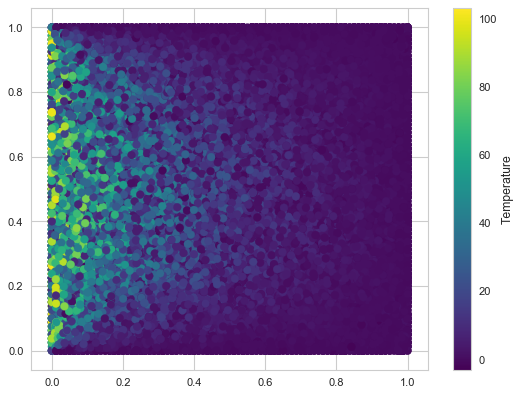

In [167]:
# plot of the temperature of the points using prediction from GBR model
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
plt.scatter(X_train.x, X_train.y, c=p2_tuned.y_pred_tuned, s=50, cmap='viridis')
lab = plt.colorbar()
lab.set_label("Temperature")

In [168]:
diff_tuned=y_train - prediction_train_tuned
p3_tuned=pd.DataFrame({'diffe_tuned': diff_tuned}, dtype='float64')


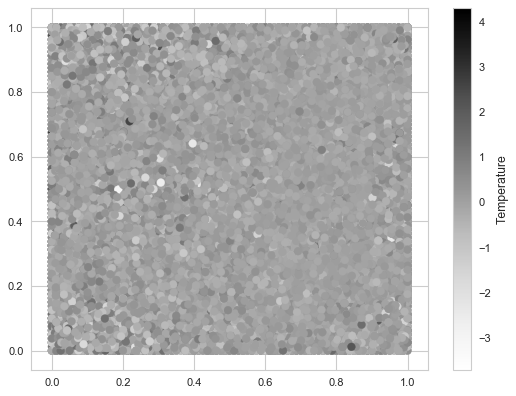

In [169]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(111)
plt.scatter(X_train.x, X_train.y, c=p3_tuned.diffe_tuned, s=50, cmap='Greys')
lab = plt.colorbar()
lab.set_label("Temperature")

In [170]:
estimation_cs = pd.DataFrame({'Actual Train T': y_train, 'Estimated T':prediction_train, 'Estimated_tuned T': prediction_train_tuned})
estimation_cs.head(40)

Actual Train T  Estimated T  Estimated_tuned T
505434       41.984393    37.802229          41.911030
276038       20.512968    19.594387          20.456877
7937          5.430014     7.104978           5.440721
388416        0.063238    -1.978359           0.420236
180338        7.036268    10.304082           6.804671
58405        24.882910    26.580031          24.670276
195666       11.230184    10.700533          11.643552
486240        6.131504    11.731510           6.478432
420191       74.538308    72.235229          75.049084
537557        0.593540    -0.062486           0.615183
471522        8.571344     8.287170           8.125740
273063       17.203594    15.569273          17.150827
375237        6.072301     6.864801           6.059962
348066        6.439011    10.208586           6.472143
43821         0.259199    -7.246423           0.434193
519798       61.135608    61.655544          60.759938
17089         0.644167    17.993435           3.048826
324795       23.519841    23.602405          23.596728
346299        3.542273     6.840033           3.833924
328386        7.977107     7.696758           7.894459
178510        7.190899    10.402170           7.587332
132630        2.675651     3.428778           2.661547
392378        8.988812     8.306472           8.911493
155404        5.210956     6.962852           4.830088
345558        0.213365    -0.976299           0.145677
147497        4.846629     6.182984           5.025400
495279       30.304489    29.177262          30.745220
183552       29.436358    25.504574          29.383599
348013        0.663427     0.616001           0.858987
116277        0.414476     1.866652           0.263135
469023        0.755991     0.839614           0.346703
241000       11.072740    11.235971          11.410626
250598        0.191418     4.661141          -0.226483
197881       10.076993    12.624257          10.337474
201445       15.038343    16.020539          15.088484
8222          0.000000    -4.768686          -0.219088
284406        2.047964     5.377765           1.784439
61765         1.209214     0.807218           0.905934
404238       27.448498    24.106502          27.209593
445760       35.924086    35.071837          36.805312

In [171]:
estimation_cs = pd.DataFrame({'Actual Test T': y_test, 'Estimated T':prediction_test, 'Estimated_tuned T': prediction_test_tuned})
estimation_cs.head(40)

Actual Test T  Estimated T  Estimated_tuned T
54292       73.031056    63.772029          72.983773
339021       8.297834     8.543513           8.254524
91397        3.428970     5.182234           3.925253
57521        7.763267    10.387818           8.900323
3851        44.863202    44.271736          44.761208
67221       77.534140    76.174103          77.773982
412912       1.022165     1.972505           0.909164
75744        1.942038     3.303012           1.659892
489322      31.676852    28.056366          31.442943
298759      17.651184    16.655702          17.803114
364368      19.018861    19.081086          18.945490
430993       0.471521    -1.324408           0.674301
26697        0.803746     0.672087           0.751517
217106       1.786422     1.563375           1.126539
77010        6.009146     6.028650           5.896457
49122       17.716678    17.233129          17.619798
62866       22.210734    22.025592          22.195585
197655       3.437474     4.133616           3.674713
296639      36.935518    32.590817          37.344541
291447       0.358337    -0.605983           0.195718
116315       0.161167    -0.948205           0.019168
460174       1.501716     1.884480           1.324160
483208      22.038297    23.373616          22.361597
395999      16.217690    16.798094          16.071431
99056        0.139077    -1.635481           0.492310
102588      14.692192    15.354872          15.594734
423270      17.659729    18.819000          17.792090
51541        1.306887     1.044204           0.965923
448724      86.530371    87.533590          87.237420
176717      26.871347    23.469245          26.766258
134013       4.024439     4.183449           4.236525
135442       1.256403     3.581758           1.311243
476975      12.272469    14.941864          13.360651
319346       6.781008     7.164652           6.456599
65034        2.823520     3.349990           2.540924
310345       2.185788     2.083643           2.194293
108601      34.007922    33.078683          33.635309
259311      23.557283    24.094053          23.502199
484235       1.604692     2.714581           1.709989
75408       85.875210    78.045686          87.370199

      Iter       Train Loss   Remaining Time 


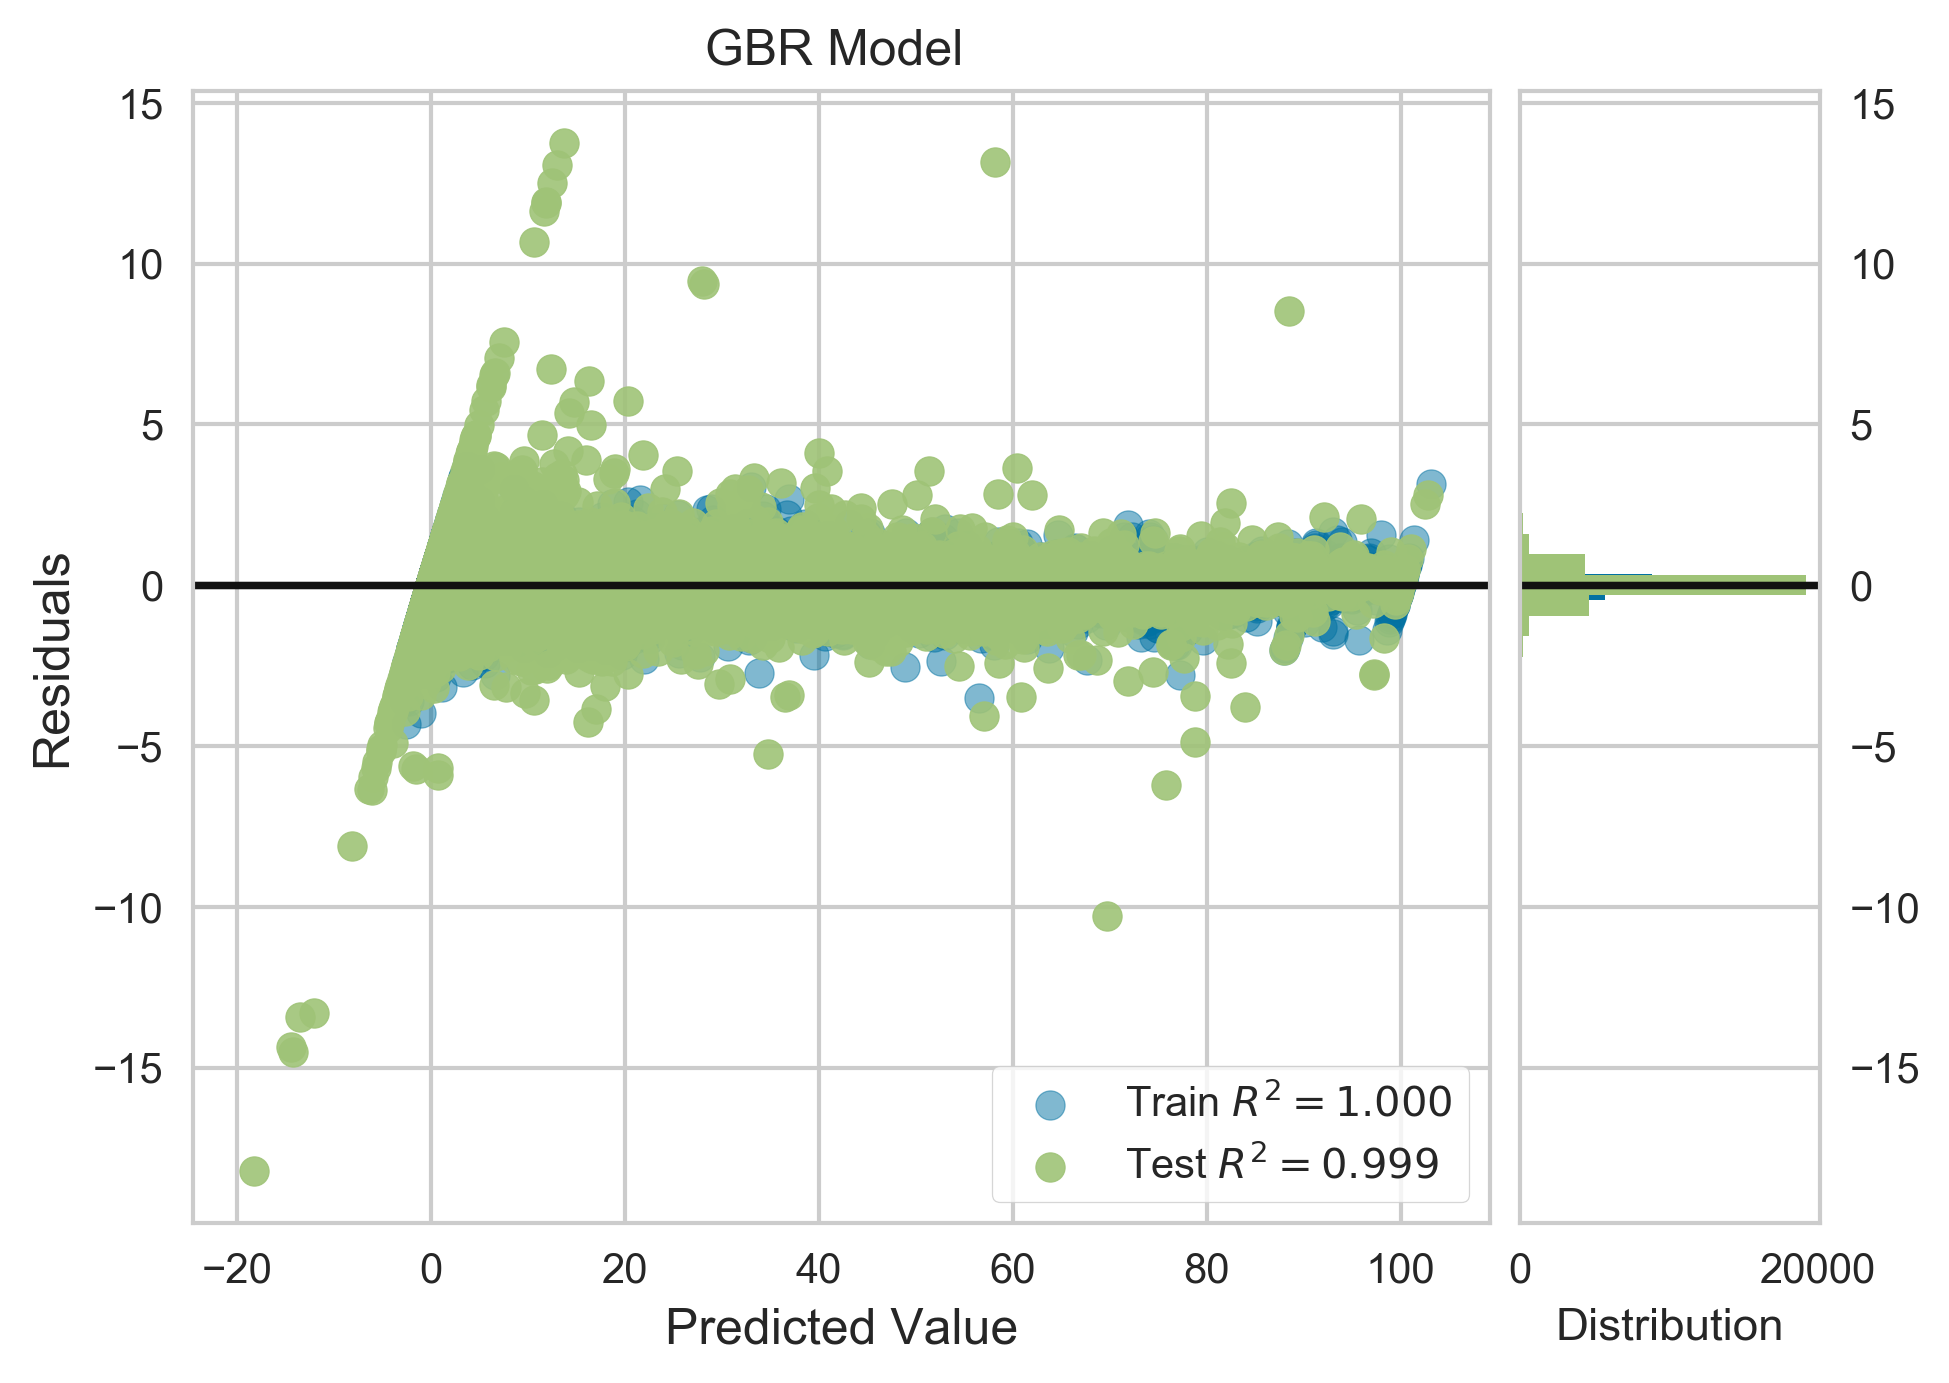

In [172]:
#Yellowbrick
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
from yellowbrick.contrib.scatter import ScatterVisualizer
plt.rcParams[('figure.figsize')]=(7,5)
plt.rcParams[('figure.dpi')]=300
my_title="GBR Model "


visualizer = ResidualsPlot(gbr_tuned, title=my_title, alpha=0.1)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
# Call finalize to draw the final yellowbrick-specific elements
visualizer.finalize()
visualizer.ax.set_xlabel("Observed/Predicted Concrete Strength (MPa)", fontsize=12)
visualizer.ax.set_ylabel("Residuals (MPa)", fontsize=12)
visualizer.ax.tick_params(axis='both', labelsize=10)
g = visualizer.poof(alpha=0.1)             # Draw/show/poof the data

      Iter       Train Loss   Remaining Time 


Text(0,0.5,'Predicted Compressive Strength (MPa)')

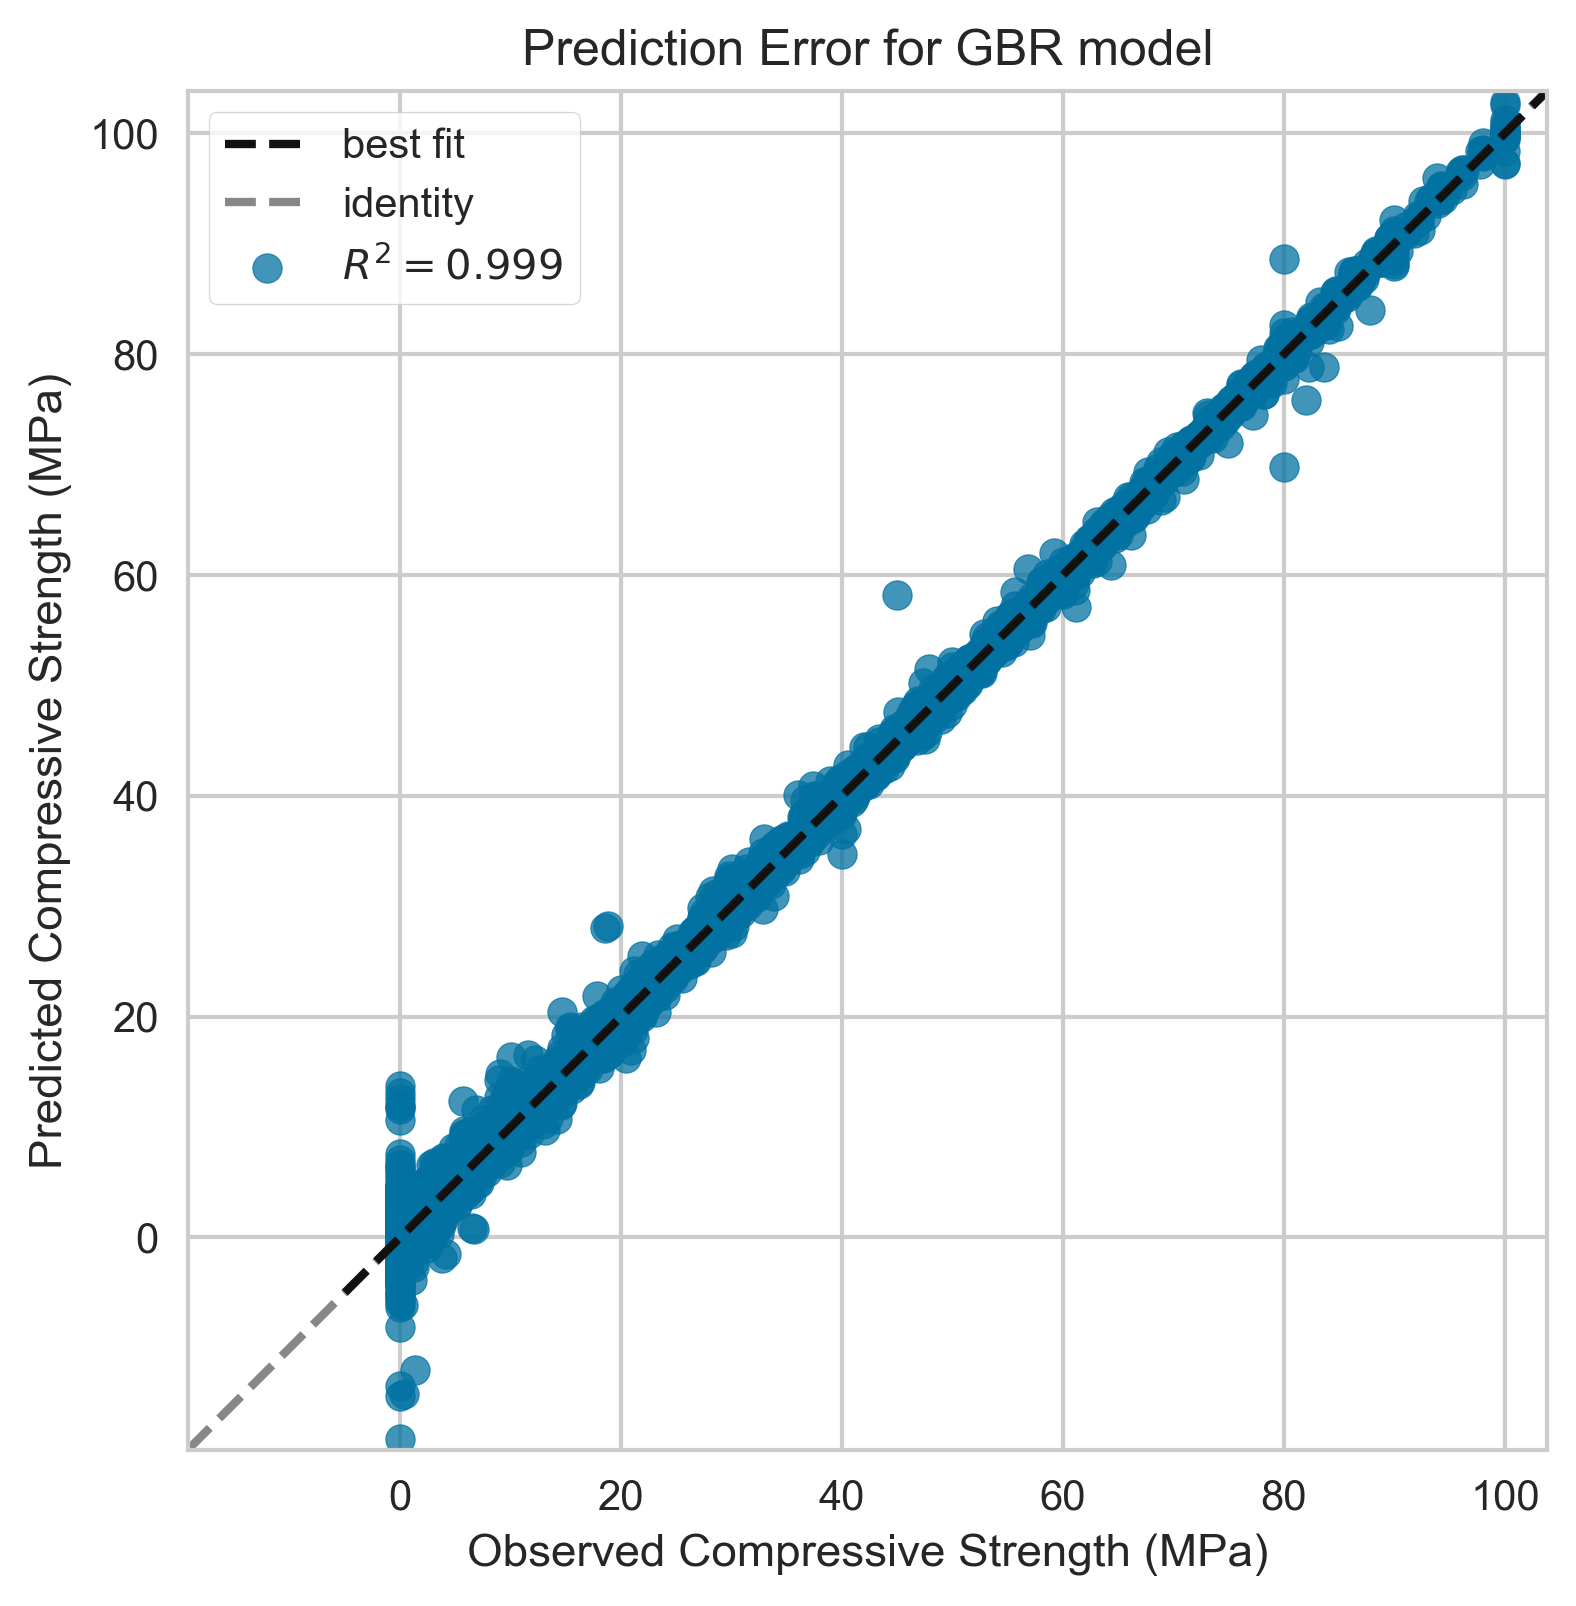

In [173]:
from yellowbrick.regressor import PredictionError

# Fit the visualizer
plt.rcParams[('figure.figsize')]=(9,6)
plt.rcParams[('figure.dpi')]=300
my_title="Prediction Error for GBR model"
model = PredictionError(gbr_tuned, title=my_title, alpha=0)
model.fit(X_train, y_train)
# model.score(X_train, y_train)
model.score(X_test, y_test)


# Call finalize to draw the final yellowbrick-specific elements
model.finalize(alpha=0.1)

# Get access to the axes object and modify labels
model.ax.set_xlabel("Observed Compressive Strength (MPa)")
model.ax.set_ylabel("Predicted Compressive Strength (MPa)")

# model.poof()